# Data Normalization & Classification: 
# Police Violence in North America

### Workshop/Lecture by June Skeeter

# Learning Outcomes:
1) Investigate how data normalization impacts the way we perceive patterns in a dataset

2) Look at different data classification methods and how they impact the way we perceive patterns in a dataset
    
* A) Revisit measurement scales, how are they related to classification methods?
* B) Choropleth mapping

# Content Warning:
* This lecture/workshop deals with a difficult and painful subject that may be triggering to some people.  The datasets we're using today describe incidents of police killings in Canada and the United States

# Pre-Lecture Poll questions:

### 1) Which country has a higher frequency of police violence?
    A) Canada
    B) The United States
    C) They're about equal
    
### 2) Which country has a greater racial disparity in incidetns of police violence?
    A) Canada
    B) The United States
    C) They're about equal

In [284]:
## This module aggregates the data into a format that's easy for us to work with
import ParseData_BU as ParseData
import numpy as np
import pandas as pd
import scipy.stats as stats
## We'll use maptloltib to make some plots
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pytablewriter
%matplotlib notebook
## Calling "GetData" does all of our prepprocessing
Data = ParseData.GetData()#start_year=2016)

In [285]:
# print(Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['prov']=='SK'])
print(Data.CA_PoliceKillings.race.unique())
# Saskatoon Police Service

['Indigenous' 'White' 'Unknown' 'Asian' 'Black' 'Middle Eastern'
 'South Asian' 'Visible minority, n.i.e' 'Latin American']


# Canadian Police Violence Data


This data was collected by the CBC and is available for download here: 
    https://newsinteractives.cbc.ca/fatalpoliceencounters/
    
* "There is no government database listing deaths at the hands of the police available to the public in Canada, so CBC News created its own. The CBC’s research librarians have collected detailed information on each case, such as ethnicity, the role of mental illness or substance abuse, the type of weapon used and the police service involved, to create a picture of who is dying in police encounters. "
    
    
* This is not an official count because police departments in Canada are not mandated to collect all of this information.  Rather this dataset is a collection of second hand information in the form of press releases, news articles, etc.  Some records are incomplete, and the total number of incidents is likely higher than detailed here.

# 1) Police killings by year
* There were 556 killings between January 2000 - June 2020
    * Increasing trend0.85 killings/year.
    * 2020 is on pace to be a record breaking year.

Total Police Killings in Canada: Jan 2000 - June 2020: 797
data_source  Both  CBC: Deadly Force  KillerCopsCanada
Year                                                  
2000          0.0               19.0               0.0
2001          0.0               15.0               0.0
2002          0.0               14.0               0.0
2003          0.0               15.0               0.0
2004          0.0               27.0               0.0
2005          0.0               31.0               0.0
2006          0.0               22.0               0.0
2007          1.0               27.0               0.0
2008          1.0               24.0               0.0
2009          0.0               25.0               1.0
2010          1.0               28.0               2.0
2011          0.0               29.0               0.0
2012          1.0               22.0               5.0
2013          3.0               21.0               1.0
2014          7.0               17.0               3.0
2015  

<IPython.core.display.Javascript object>


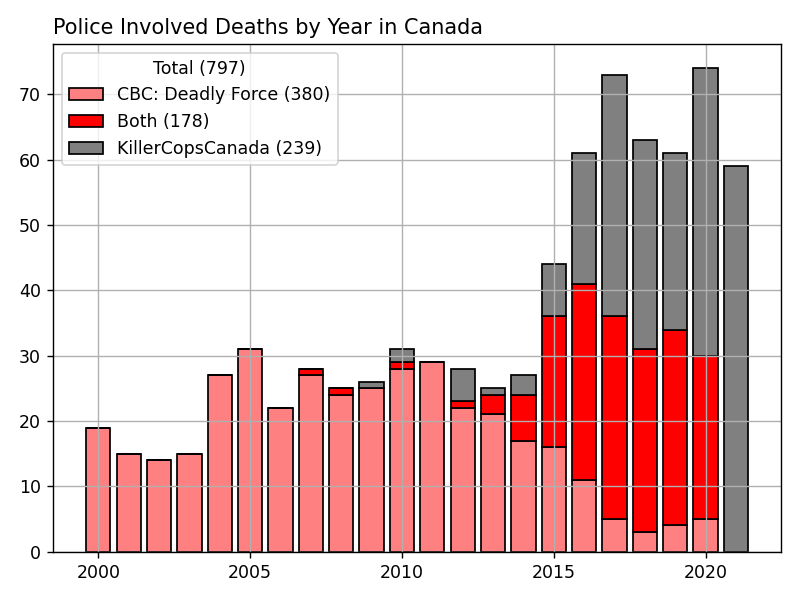

In [286]:
CA_Total=Data.CA_PoliceKillings['prov'].count()
print('Total Police Killings in Canada: Jan 2000 - June 2020: '+str(CA_Total.sum()))
# print(ByYear.)
ByYear=Data.CA_PoliceKillings.resample('YS').count()['prov']

Data.CA_PoliceKillings['Year']=Data.CA_PoliceKillings.index.year
PID_Canada = Data.CA_PoliceKillings.groupby(['Year','data_source']).count()['prov'].unstack().fillna(0)

print(PID_Canada)
LR = stats.linregress(ByYear.index.year,ByYear.values)
# print(LR)

# print(Year_Data)
# # print(CBC_2018)

fig,ax=plt.subplots(1,1)
ax.set_title('Police Involved Deaths by Year in Canada',loc='left')
ax.bar(PID_Canada.index,PID_Canada['CBC: Deadly Force'],
       color=[1,0.5,0.5],edgecolor='k',label='CBC: Deadly Force ('+str(int(PID_Canada['CBC: Deadly Force'].sum()))+')')
ax.bar(PID_Canada.index,PID_Canada['Both'],bottom = PID_Canada['CBC: Deadly Force'],
       color=[1,0,0],edgecolor='k',label='Both ('+str(int(PID_Canada['Both'].sum()))+')')
ax.bar(PID_Canada.index,PID_Canada['KillerCopsCanada'],bottom = PID_Canada['CBC: Deadly Force']+PID_Canada['Both'],
       color=[0.5,0.5,0.5],edgecolor='k',label='KillerCopsCanada ('+str(int(PID_Canada['KillerCopsCanada'].sum()))+')')
# ax.bar([2020],[ByYear.values[-1]],color=[1,.5,.5],edgecolor='k',label='Total Jan-Nov')
# ax.plot(PID_Canada.index,PID_Canada.index*LR[0]+LR[1],
#         color='k',label = 'Trend Line: '+str(np.round(LR[0],2))+' Deaths per year')
plt.grid()
plt.legend(title='Total ('+str(CA_Total)+')')
plt.tight_layout()
plt.savefig('Content/CA_Trendline.png')

# 2) Age distribution of victims

Histograms show the shape and spread of a dataset.
* Here we see the age distribution of victims in 5 year increments.
    * The youngest was 15 and the oldest was 77
    * The mean age is 35.6, the standard deviation is 11.6
* The histogram shows us that the age is slightly skewed towards older ages
    * The distribution has a tail

count    743.000000
mean      37.059219
std       13.157423
min        1.000000
25%       27.000000
50%       36.000000
75%       45.000000
max       94.000000
Name: age, dtype: float64


<IPython.core.display.Javascript object>


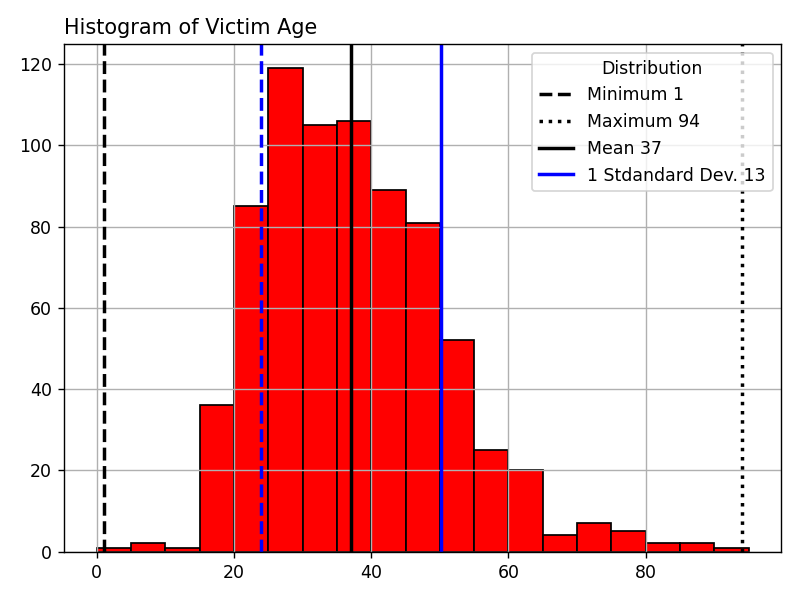

In [287]:
print(Data.CA_PoliceKillings['age'].describe())
fig,ax=plt.subplots(1,1)
Data.CA_PoliceKillings['age'].hist(bins = np.arange(0,100,5),color=[1,0,0],edgecolor='k',ax=ax)

plt.axvline(Data.CA_PoliceKillings['age'].min(), color='k', linewidth=2, linestyle='--',
            label='Minimum '+str(int(Data.CA_PoliceKillings['age'].min())))
plt.axvline(Data.CA_PoliceKillings['age'].mean()-Data.CA_PoliceKillings['age'].std(), 
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(Data.CA_PoliceKillings['age'].max(), color='k', linewidth=2, linestyle=':',
            label='Maximum '+str(int(Data.CA_PoliceKillings['age'].max())))
plt.axvline(Data.CA_PoliceKillings['age'].mean(), color='k', linewidth=2,
            label='Mean '+str(int(Data.CA_PoliceKillings['age'].mean())))
plt.axvline(Data.CA_PoliceKillings['age'].mean()+Data.CA_PoliceKillings['age'].std(), 
            color='b', linewidth=2,
            label='1 Stdandard Dev. '+str(int(Data.CA_PoliceKillings['age'].std())))

ax.set_title('Histogram of Victim Age',loc='left')
plt.legend(title='Distribution')
plt.tight_layout()
plt.savefig('Content/CA_AgeHist.png')

# 3) What type of weapon (if any) did the victim have?
* Nearly 30% of victims were unarmed.
    * Note - Being Armed is does not justify any individual police killing.
    * However, in aggregate a higher number of killings of unarmed people can indicate a predisposition towards excessive use of force.

<IPython.core.display.Javascript object>


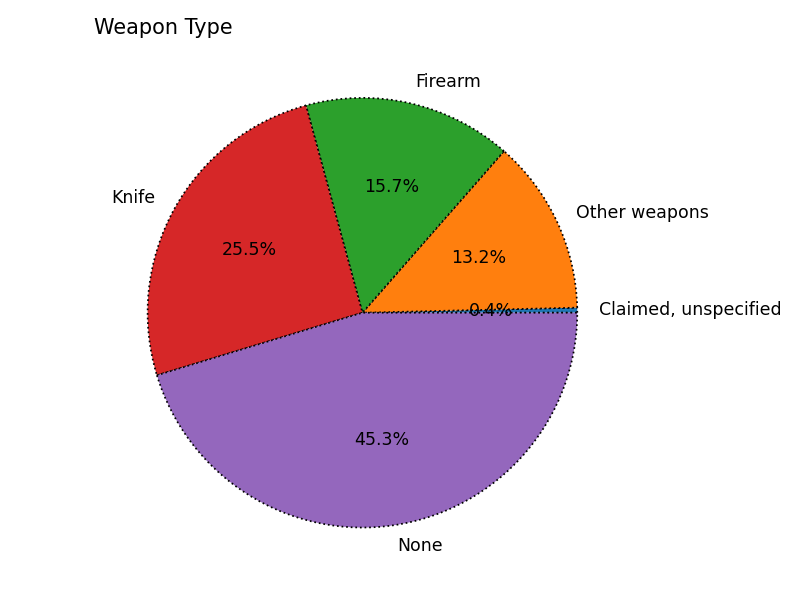

In [288]:
fig,ax=plt.subplots(1,1)
ax.set_title('Weapon Type',loc='left')
Weaopn_Type=Data.CA_PoliceKillings.groupby('armed_type').count()['prov'].sort_values()
# print(Weaopn_Type)
ax.pie(Weaopn_Type.values,labels=Weaopn_Type.index,
       
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': ':'},
    autopct='%1.1f%%')
plt.tight_layout()
plt.savefig('Content/CA_Weapon.png')

In [289]:
print(Data.CA_PoliceKillings.loc[((Data.CA_PoliceKillings.prov=='QC') &
                                  (Data.CA_PoliceKillings.index.year == 2019))])

                 date  first_name  last_name  middle_name   age gender  \
date                                                                     
2019-07-05 2019-07-05       Sandy      Alaku  Unspecified  48.0   Male   
2019-06-28 2019-06-28       Denis  Chalifoux  Unspecified  50.0   Male   
2019-03-30 2019-03-30  Jean-Louis    D'amour          NaN  77.0   Male   

                  race prov                              department  \
date                                                                  
2019-07-05  Indigenous   QC           Kativik Regional Police Force   
2019-06-28     Unknown   QC  Service de police de la Ville de Laval   
2019-03-30     Unknown   QC                        Sûreté du Québec   

           cause_death  ... sixth KCC ID seventh KCC link seventh KCC ID  \
date                    ...                                                
2019-07-05     Vehicle  ...          NaN              NaN            NaN   
2019-06-28         NaN  ...          NaN     

In [290]:
# Data.CA_PoliceKillings.race.fillna('Unknown',inplace=True)
Cat = 'race'
Departments=Data.CA_PoliceKillings.groupby(['department','prov',Cat]).count()['summary'].unstack()
Departments=Departments.reset_index().set_index('department')
Departments=Departments.fillna(value=0)

Departments['Total'] = Departments[Data.CA_PoliceKillings[Cat].unique()].sum(axis=1)

Departments['NAME']=Departments.index
Departments['NAME']=Departments['NAME'].str.replace(' Department','')
Departments['NAME']=Departments['NAME'].str.replace(' Services','')
Departments['NAME']=Departments['NAME'].str.replace(' Service','')
Departments['NAME']=Departments['NAME'].str.replace(' Force','')
Departments['NAME']=Departments['NAME'].str.replace('Service de police de la Ville de ','')
Departments['NAME']=Departments['NAME'].str.replace('Service de la sécurité publique de ','')
Departments['NAME']=Departments['NAME'].str.replace('Service de police de ','')
Departments['NAME']=Departments['NAME'].str.replace('Régie intermunicipale de police ','')
Departments['NAME']=Departments['NAME'].str.replace('Service de sécurité publique de ','')
Departments['NAME']=Departments['NAME'].str.replace('Sécurité publique de ','')

Departments['City']=Departments['NAME'].str.replace('Ontario Provincial Police','')
Departments['City']=Departments['City'].str.replace(' Police','')
Departments['City']=Departments['City'].str.replace('RCMP','')
Departments['City']=Departments['City'].str.replace('Sûreté du Québec','')
Departments['City']=Departments['City'].str.replace(' Regional','')
Departments['City']=Departments['City'].str.replace('Royal Newfoundland Constabulary','')
Departments['City']=Departments['City'].str.replace(' Community','')
Departments['City']=Departments['City'].str.replace('South Coast British Columbia Transit Authority','')
Departments['City']=Departments['City'].str.replace("l'agglomération de ",'')
Departments['City']=Departments['City'].str.replace('du ','')

Departments['TYPE']='Municipal/Regional'
# Departments.loc[Departments.index.str.contains('Regional')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Toronto')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains("Service de police de l'agglomération de ")==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Transit Authority Police Service')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Régie intermunicipale de police')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Service de police de la Ville de Montréal')==True,'TYPE']='Regional'
Departments.loc[Departments.index.str.contains('RCMP')==True,'TYPE']='RCMP'
Departments.loc[Departments.index.str.contains('Ontario Provincial Police')==True,'TYPE']='Provincial'
Departments.loc[Departments.index.str.contains('OPP')==True,'TYPE']='Provincial'
Departments.loc[Departments.index.str.contains('Sûreté du Québec')==True,'TYPE']='Provincial'
Departments.loc[Departments.index.str.contains('Royal Newfoundland Constabulary')==True,'TYPE']='Provincial'

writer = pytablewriter.MarkdownTableWriter()
writer.table_name = "Deadliest Police Departments in Canada"
writer.header_list = ['Rank',"Department", "Province", "Killings"]
TB = Departments.loc[Departments['Total']>=10].sort_values(by='Total',ascending=False).reset_index()#[0:10]
writer.value_matrix = [[index+1,value['department'],value['prov'],value['Total']]for index,value in TB.iterrows()]
# list(Departments.groupby('TYPE').count()['NAME'])
#     ["1", "AD", "Europe/Andorra"],
#     ["2", "AE", "Asia/Dubai"],
#     ["3", "AF", "Asia/Kabul"],
#     ["4", "AG", "America/Antigua"],
#     ["5", "AI", "America/Anguilla"],
# ]
# print(Departments.head())
writer.write_table()

print(Departments['Total'].count())
print(Departments.loc[Departments['Total']>=10,'Total'].sum())
print(Departments.loc[Departments['Total']>=10,'Total'].count())

print(Departments.loc[Departments['Total']>=10,'Total'].sum()/CA_Total.sum())

print(Departments.loc[Departments.index == 'RCMP'].sum()['Total'])

print(Departments.loc[Departments.index == 'RCMP'].sum()['Total']/CA_Total.sum())

# print(80/CA_Total.sum())


# Deadliest Police Departments in Canada
|Rank|               Department                |Province|Killings|
|---:|-----------------------------------------|--------|-------:|
|   1|RCMP                                     |BC      |     108|
|   2|Toronto Police Service                   |ON      |      71|
|   3|Ontario Provincial Police                |ON      |      52|
|   4|RCMP                                     |AB      |      50|
|   5|Sûreté du Québec                         |QC      |      47|
|   6|Edmonton Police Service                  |AB      |      43|
|   7|Service de police de la Ville de Montreal|QC      |      32|
|   8|Winnipeg Police Service                  |MB      |      31|
|   9|Calgary Police Service                   |AB      |      31|
|  10|Vancouver Police Department              |BC      |      27|
|  11|Peel Regional Police                     |ON      |      21|
|  12|RCMP                                     |SK      |      16|
|  13|Ottawa Police S

In [291]:
PID_Canada=Data.CA_PoliceKillings.groupby(['city_town','prov','race']).count()['department']#.reset_index().sort_values(by='department')
PID_Canada = PID_Canada.unstack().reset_index().fillna(0)
races = Data.CA_PoliceKillings.race.unique()
PID_Canada['Total']=PID_Canada[races].sum(axis=1)
PID_Canada

race       city_town prov  Asian  Black  Indigenous  Latin American  \
0     100 Mile House   BC    0.0    0.0         0.0             0.0   
1         Abbotsford   BC    0.0    0.0         0.0             0.0   
2            Agassiz   BC    0.0    0.0         0.0             0.0   
3        Ahtahkakoop   SK    0.0    0.0         1.0             0.0   
4            Airdrie   AB    0.0    0.0         0.0             0.0   
..               ...  ...    ...    ...         ...             ...   
350       Yamachiche   QC    0.0    0.0         0.0             0.0   
351      Yellowknife   NT    0.0    0.0         1.0             0.0   
352             York   ON    0.0    0.0         0.0             0.0   
353        kugluktuk   NU    0.0    0.0         1.0             0.0   
354      √éle-Perrot   QC    0.0    0.0         0.0             0.0   

race  Middle Eastern  South Asian  Unknown  Visible minority, n.i.e  White  \
0                0.0          0.0      1.0                      0.0    0.0   
1                0.0          0.0      0.0                      1.0    0.0   
2                0.0          0.0      1.0                      0.0    0.0   
3                0.0          0.0      0.0                      0.0    0.0   
4                0.0          0.0      1.0                      0.0    0.0   
..               ...          ...      ...                      ...    ...   
350              0.0          0.0      0.0                      0.0    1.0   
351              0.0          0.0      0.0                      0.0    0.0   
352              0.0          0.0      1.0                      0.0    0.0   
353              0.0          0.0      0.0                      0.0    0.0   
354              0.0          0.0      0.0                      0.0    1.0   

race  Total  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  
..      ...  
350     1.0  
351     1.0  
352     1.0  
353     1.0  
354     1.0  

[355 rows x 12 columns]

In [292]:
from geopy.geocoders import MapBox
import geopandas as gpd
api_key="pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2twY3g4aXloMWFlcDJzbXN3aG95aG5uZiJ9.mFiJt0MIfL1MiJ2rB2xhKQ"

geolocator = MapBox(api_key=api_key)

# print(Departments)
PID_Canada['Lat']=np.nan
PID_Canada['Lon']=np.nan
PID_Canada['Geocoding_notes']=''
print(PID_Canada.shape)
for index,row in PID_Canada.iterrows():
#     print(index)
    try:
        Point = geolocator.geocode(row.city_town+', '+Data.can_province_names[row.prov]+', Canada')#,exactly_one=False)
        PID_Canada.loc[PID_Canada.index==index,['Lat','Lon']]=[Point.latitude,Point.longitude]
    except:
        PID_Canada.loc[PID_Canada.index==index,'Geocoding_notes']='Geocoding Failed'
        pass



(355, 15)


In [293]:
print(PID_Canada.loc[PID_Canada['Geocoding_notes']=='Geocoding Failed'])

race             city_town prov  Asian  Black  Indigenous  Latin American  \
90    Forest Glen/Carleton   NS    0.0    0.0         0.0             0.0   
273        Seaforth/Walton   ON    0.0    0.0         0.0             0.0   
300    Sudbury/Minnow Lake   ON    0.0    0.0         0.0             0.0   

race  Middle Eastern  South Asian  Unknown  Visible minority, n.i.e  White  \
90               0.0          0.0      0.0                      0.0    1.0   
273              0.0          0.0      0.0                      0.0    1.0   
300              0.0          0.0      0.0                      0.0    1.0   

race  Total  Lat  Lon   Geocoding_notes  
90      1.0  NaN  NaN  Geocoding Failed  
273     1.0  NaN  NaN  Geocoding Failed  
300     1.0  NaN  NaN  Geocoding Failed  


In [294]:
# from geopy.geocoders import MapBox
import folium
# # from IPython.display import clear_output

# api_key = "pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2s4a285NTM1MDQwbDNocHozdXlkNzIyaSJ9.-_8gh9gG4VuprIPnmXBr3A"

def plot_point(Map,X,Y,Popup_Text,Color='olive',Radius=5,Opacity=.75,LineColor='black',LineWidth=.15):
    folium.CircleMarker(
        # The coordiatnates
        location=[X,Y],
        # Text description
        popup=Popup_Text,
        # sets the fill color for the point
        fill_color=Color,
        # Size of the marker
        radius=Radius,
        # Opacity of the circle
        fill_opacity = Opacity,
        # Sets the line color for the edge
        color=LineColor,
        # Width of the border line
        line_weight=LineWidth,
    ).add_to(Map)

Scale,Offset=1,3
    
Final_Map = folium.Map(
    location=[60,-91.5],
    zoom_start=3,
    tiles='Stamen Toner'
)

group0 = folium.FeatureGroup(name='Police Involved Deaths')
# group1 = folium.FeatureGroup(name='Provincial Police Forces')
# group2 = folium.FeatureGroup(name='Municipal/Regional Police Forces')
# Cats=Data.CA_PoliceKillings['race'].unique()
for index, row in PID_Canada.loc[PID_Canada['Geocoding_notes']!='Geocoding Failed'].iterrows():
#     if row['geocoding_Notes'] != 'Geocoding Failed':
        
#     popuptext='''<body> <h2>'''+row['city_town']+'''</h2> 
#                      <table style="width:100%">
#                      <tr>
#                      <th>Number of Deaths &nbsp </th>
#                      <th>'''+str(row['department'])+ '''</th>
#                      </tr>
#                       '''
    
    # ''' indicates we're wrting multiline strings
    # We'll write the header and the top row of the table
    popuptext='''<body> <h2>'''+row['city_town']+'''</h2> 
                <table style="width:100%">
                <tr>
                <th>race</th>
                <th>Number of Killings &nbsp </th>
                <th>Percentage of Total</th>
                </tr>
                 '''

    # We'll sort each row by race so the largest appears at the top of the table
    Sorted = row[races].sort_values(ascending=False)
    for i,v in zip(Sorted.index,Sorted.values):
        if (np.isnan(v)==False) and (v>0):
            if np.isnan(v)==False:
                # If the value for a race exists, we'll add it to the table
                popuptext+= '''<tr>
                            <td>'''+i+''' &nbsp </td>
                            <td>'''+str(int(v))+'''</td>
                            <td>'''+str(int(v/row['Total']*100))+'''%</td>
                            </tr>'''
#         We'll add row at the bottom of the table with the total


    popuptext+='''<tr>
                  <th>Total </th>
                  <th>'''+str(row['Total'])+'''</th>
                  <th> </th>
                  </tr>'''

        # We'll convert the text tot html
    test = folium.Html(popuptext, script=True)
#         folium.
        
        # This defines the parameters for the popup text box
    popup = folium.Popup(test, max_width=400,min_width=300)
        
#         # Now we can send the popup to the CircleMarker
#         if row['TYPE']=='RCMP':
    plot_point(Map=group0,
               X=row.Lat,#['latitude'],
               Y=row.Lon,#['longitude'],
               Popup_Text=popup,
               # This is hexcode for the official red of Canada
               Color='#FF0000',
               # We'll scale the radius by the number of killings + 2
               Radius=(row['Total'])*Scale+Offset,
              )
            
#         elif row['TYPE']=='Provincial':
#             plot_point(Map=group1,
#                        X=row.Lat,#['latitude'],
#                        Y=row.Lon,#['longitude'],
#                        Popup_Text=popup,
#                        # This is hexcode for the official red of Canada
#                        Color='#9400D3',
#                        # We'll scale the radius by the number of killings + 2
#                        Radius=(row['Total'])*Scale+Offset,
#                       )
#         else:
#             plot_point(Map=group2,
#                    X=row.Lat,#['latitude'],
#                    Y=row.Lon,#['longitude'],
#                    Popup_Text=popup,
#                    # This is hexcode for the official red of Canada
#                    Color='#0000ff',
#                    # We'll scale the radius by the number of killings + 2
#                    Radius=(row['Total'])*Scale+Offset,
#                   )
group0.add_to(Final_Map)


# group2.add_to(Final_Map)


# group1.add_to(Final_Map)
    
folium.LayerControl().add_to(Final_Map)
    
Final_Map.save('Content/PoliceViolenceIncidents.html')
Final_Map


# 5) The racial breakdown of police killings.
* The majority of police killings are white people
    * The second largest demographic is "Unknown", which in most cases means the this information was not recorded by the police.  Since this data was collected and reported by a third party rather through a central database, information is missing.  This information should be mandatory for police departments to collect and publish.
* Demographic groups are not evenly represented in the populations
    * Canada is about 73.4% White while its only 4.7% Indigenous and 3.4% Black


0.034096332333932486
                                0
Indigenous                1673780
White                    25803358
Unknown                         0
Asian                     3216380
Black                     1198545
Middle Eastern             523235
South Asian               1924640
Visible minority, n.i.e    364460
Latin American             447330


<IPython.core.display.Javascript object>


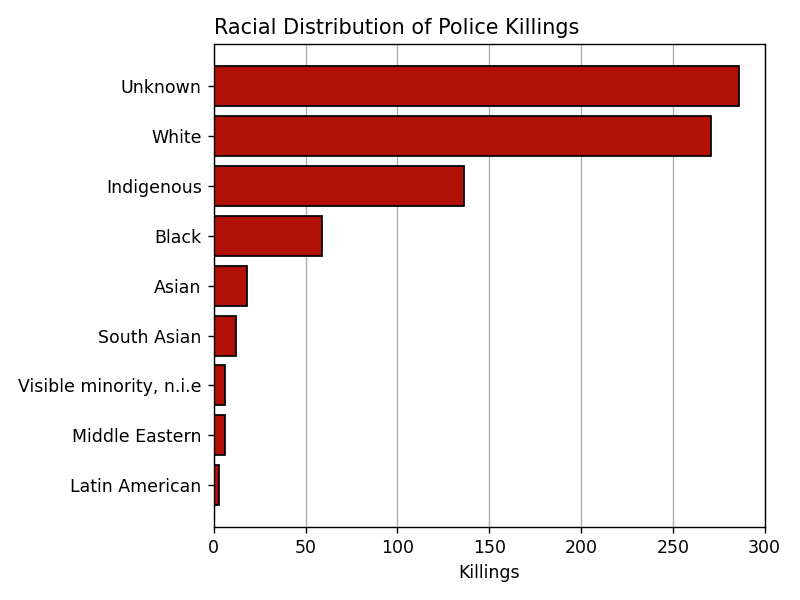

                         prov
race                         
Latin American              3
Middle Eastern              6
Visible minority, n.i.e     6
South Asian                12
Asian                      18
Black                      59
Indigenous                136
White                     271
Unknown                   286


<IPython.core.display.Javascript object>


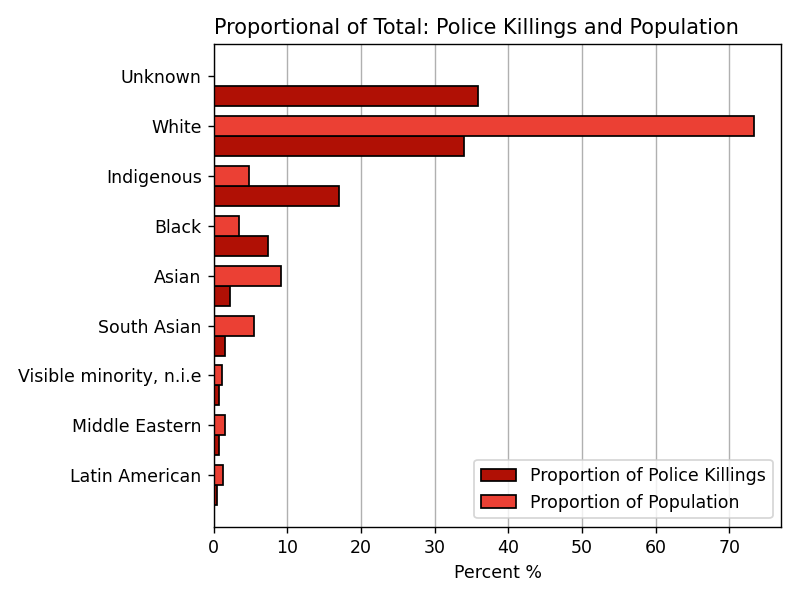

                             prov         0
race                                       
Latin American           0.003764  0.012726
Middle Eastern           0.007528  0.014885
Visible minority, n.i.e  0.007528  0.010368
South Asian              0.015056  0.054752
Asian                    0.022585  0.091500
Black                    0.074028  0.034096
Indigenous               0.170640  0.047616
White                    0.340025  0.734057
Unknown                  0.358846  0.000000


<IPython.core.display.Javascript object>


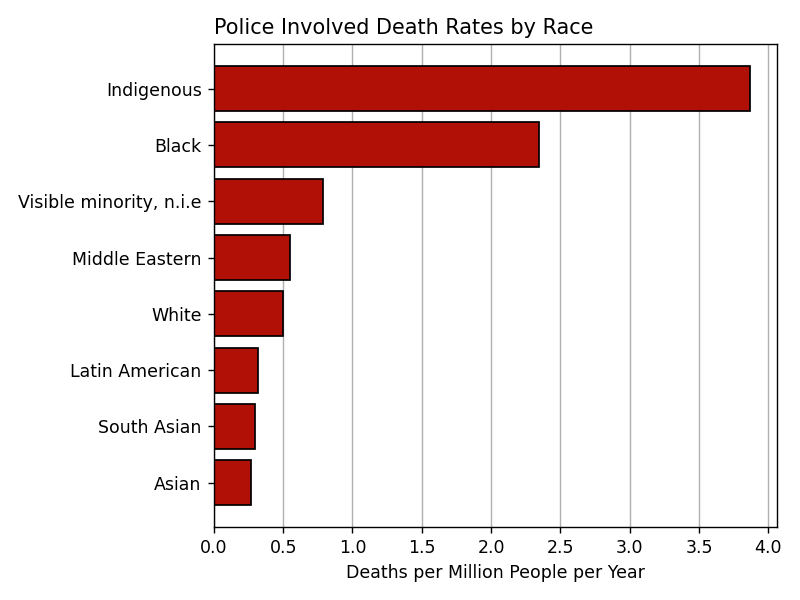

                         prov         0      Norm
race                                             
Asian                      18   3216380  0.266493
South Asian                12   1924640  0.296902
Latin American              3    447330  0.319355
White                     271  25803358  0.500119
Middle Eastern              6    523235  0.546053
Visible minority, n.i.e     6    364460  0.783939
Black                      59   1198545  2.344112
Indigenous                136   1673780  3.869201
1.0796732653478929
797


<ipython-input-295-484c6d838103>:58: RuntimeWarning: divide by zero encountered in true_divide
  Byrace['Norm']=Byrace['prov'].values/Byrace[0].values*1e6/21


In [295]:
print(Data.CA.sum()['Black']/Data.CA.sum()['Total'])

races = (Data.CA_PoliceKillings['race'].unique())
Pop = Data.CA[races].sum().to_frame()
print(Pop)
# print(Data.CA[Data.CA_PoliceKillings['race'].unique()])

fig,ax=plt.subplots(1,1)
ax.grid(axis='x',zorder=0)
ax.set_title('Racial Distribution of Police Killings',loc='left')
Byrace=Data.CA_PoliceKillings.groupby('race').count()['prov'].sort_values()
Byrace=Byrace.to_frame()
# Byrace = Byrace.join(Pop/Pop.sum(),lsuffix='_Pop')
print(Byrace)
# Byrace[['prov',0]].plot(kind='barh')
ax.barh(np.arange(Byrace.index.shape[0]),Byrace['prov'].values,color='#b01005',edgecolor='k',
        height=.8,label='Proportion of Police Killings',zorder=2)
# ax.barh(np.arange(Byrace.index.shape[0]),Byrace[0].values,color='#eb4034',edgecolor='k',
#         height=.4,label='Proportion of Population')
ax.set_yticks(np.arange(Byrace.index.shape[0]))
ax.set_yticklabels(Byrace.index)
ax.set_xlabel('Killings')
# ax.legend()
plt.tight_layout()
plt.savefig('Content/CA_race.png')



fig,ax=plt.subplots(1,1)
ax.grid(axis='x',zorder=0)

ax.set_title('Proportional of Total: Police Killings and Population',loc='left')
Byrace=Data.CA_PoliceKillings.groupby('race').count()['prov'].sort_values()
Byrace=(Byrace/Byrace.sum()).to_frame()
Byrace = Byrace.join(Pop/Pop.sum(),lsuffix='_Pop')
print(Byrace)
# Byrace[['prov',0]].plot(kind='barh')
ax.barh(np.arange(Byrace.index.shape[0])-.4,Byrace['prov'].values*100,color='#b01005',edgecolor='k',
        height=.4,label='Proportion of Police Killings',zorder=2)
ax.barh(np.arange(Byrace.index.shape[0]),Byrace[0].values*100,color='#eb4034',edgecolor='k',
        height=.4,label='Proportion of Population',zorder=2)
ax.set_yticks(np.arange(Byrace.index.shape[0]))
ax.set_yticklabels(Byrace.index)
ax.set_xlabel('Percent %')
ax.legend()
plt.tight_layout()

plt.savefig('Content/CA_race_Proportional.png')


fig,ax=plt.subplots(1,1)
ax.grid(axis='x',zorder=0)

ax.set_title('Police Involved Death Rates by Race',loc='left')
Byrace=Data.CA_PoliceKillings.groupby('race').count()['prov'].sort_values()
Byrace=Byrace.to_frame()
Byrace = Byrace.join(Pop,lsuffix='_Pop')
Byrace['Norm']=Byrace['prov'].values/Byrace[0].values*1e6/21
Byrace=Byrace.sort_values(by='Norm')[:-1]
print(Byrace)
# Byrace[['prov',0]].plot(kind='barh')
# ax.barh(np.arange(Byrace.index.shape[0])-.4,Byrace['prov'].values,color='#b01005',edgecolor='k',
#         height=.4,label='Proportion of Police Killings',zorder=2)
ax.barh(np.arange(Byrace.index.shape[0]),Byrace['Norm'],color='#b01005',edgecolor='k',
        height=.8,label='Proportion of Population',zorder=2)
ax.set_yticks(np.arange(Byrace.index.shape[0]))
ax.set_yticklabels(Byrace.index)
ax.set_xlabel('Deaths per Million People per Year')
# ax.legend()
plt.tight_layout()

plt.savefig('Content/CA_race_Normalized.png')#_Even_If



print(CA_Total.sum()/Data.CA.Total.sum()/21*1e6)
# print(Data.CA.Total.sum())
print(CA_Total.sum())

In [296]:
# print(C)
# print(PID_Canada.city_town)
# PID_Canada.loc[PID_Canada.city_town == C]#.values#.flatten()

In [297]:
Add = Data.CA_PoliceKillings['race'].loc[Data.CA_PoliceKillings['race']=='Unknown'].shape[0]
print(Add)
print(Byrace.loc[Byrace.index=='White','prov'])
if Byrace.loc[Byrace.index=='White','prov'].values[0] < Add:
    Byrace.loc[Byrace.index=='White','prov']+=Add
from scipy.stats import chisquare

# print(Byrace)


R = Byrace.index.values

R2 = [r+'_Killings'for r in R]


# R = Byrace.index#.drop('Unknown').values
Temp = Data.CA[R2].fillna(0).sum()
# Temp.loc[Temp.index=='White Killings']+=Add
# print(Temp)
# print('DFa')
# Data.CA.loc[R2]

F_obs=Data.CA[R2].fillna(0).sum().values
F_obs[3]+=Add
F_exp=Data.CA[R].fillna(0).sum().values

F0 = F_exp.tolist()
# print(Data.CA)
F0.append(F_exp.sum())


F_exp = F_exp*(Data.CA_PoliceKillings.count().race/F_exp.sum())

print(Add)
res = chisquare(F_obs, f_exp=F_exp)
print(res)


R = R.tolist()
R.append('Total')


F1 = F_exp.tolist()
F1.append(F_exp.sum())
F2 = F_obs.tolist()
F2.append(Data.CA_PoliceKillings.count().race)

# F0.append(0)
# R = np.append(R,'Unknown')
# F1.append(0)
# F2.append(Data.CA['Unknown_Killings'].sum())

from tabulate import tabulate
d = {"By race": ["Total Population (Millions)", "Expected Deaths", "Observed Deaths"]}
for i,r in enumerate(R):
    d[r]=[int(F0[i]/1e5)/10,int(F1[i]),int(F2[i])]
df = pd.DataFrame(d).set_index("By race")
df = df.T.sort_values(by='Total Population (Millions)',ascending=False).T
# df.loc[df.index!='Observed Deaths','Unknown']='--'


print(tabulate(df.T, tablefmt="pipe", headers="keys"))
# print(Data.CA['Total_Killings'].sum()/Data.CA['Total'].sum()*1e6/21)
# print(Data.CA['Total_Killings'].sum())
# print(Data.CA_PoliceKillings.count())

# T = (Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['race']=='Unknown'].groupby('POLICE SERVICE').count()['GENDER'].sort_values())

# print(T/T.sum())

286
race
White    271
Name: prov, dtype: int64
286
Power_divergenceResult(statistic=364.8967491570321, pvalue=7.959950923149648e-75)
|                         |   Total Population (Millions) |   Expected Deaths |   Observed Deaths |
|:------------------------|------------------------------:|------------------:|------------------:|
| Total                   |                          35.1 |               797 |               797 |
| White                   |                          25.8 |               585 |               556 |
| Asian                   |                           3.2 |                72 |                18 |
| South Asian             |                           1.9 |                43 |                12 |
| Indigenous              |                           1.6 |                37 |               136 |
| Black                   |                           1.1 |                27 |                59 |
| Middle Eastern          |                           0.5 |        

### Think about how comparing at the total killings for population groups of very different sizes might impact the way you perceive patterns.  Using this chart, what demographic group do you think is most likely to be killed by the police in Canada?

# 4) Which police departments are responsible for the most killings?
Here are all departments which have killed at least ten people in the last 20 years.
* Provincial police services and large municipal police departments are responsible for the most deaths
* The RCMP serves as the provincial police in eight provinces and the territories.
    * All together, the RCMP is responsible for 34% of deaths 

<IPython.core.display.Javascript object>


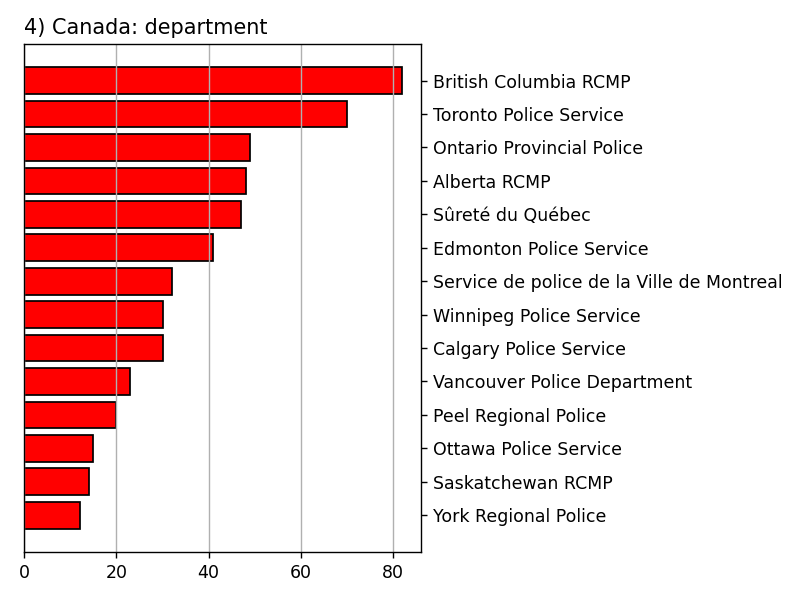

department
York Regional Police                         0.023392
Saskatchewan RCMP                            0.027290
Ottawa Police Service                        0.029240
Peel Regional Police                         0.038986
Vancouver Police Department                  0.044834
Calgary Police Service                       0.058480
Winnipeg Police Service                      0.058480
Service de police de la Ville de Montreal    0.062378
Edmonton Police Service                      0.079922
Sûreté du Québec                             0.091618
Alberta RCMP                                 0.093567
Ontario Provincial Police                    0.095517
Toronto Police Service                       0.136452
British Columbia RCMP                        0.159844
Name: Total, dtype: float64


In [246]:
# print(Data.CA.Total.sort_values()/Data.CA.Total.sum())
ARMED_TYPE=(Data.CA_PoliceKillings.groupby(['department','armed_type']).count()['age'].unstack())
# print(ARMED_TYPE)
ARMED_TYPE_RCMP_prov=(Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['department']=='RCMP'].groupby(['prov','armed_type']).count()['age'].unstack())
ARMED_TYPE_RCMP_prov['Name'] = [Data.can_province_names[x] for x in ARMED_TYPE_RCMP_prov.index]
ARMED_TYPE_RCMP_prov['department']=ARMED_TYPE_RCMP_prov['Name']+' RCMP'

ARMED_TYPE_RCMP_prov=ARMED_TYPE_RCMP_prov.set_index(ARMED_TYPE_RCMP_prov['department'])
# print(ARMED_TYPE_RCMP_prov)
# print(ARMED_TYPE)

ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE.index !='RCMP'].append(ARMED_TYPE_RCMP_prov)


Types = ARMED_TYPE.columns
ARMED_TYPE['Total']=ARMED_TYPE.sum(axis=1)

fig,ax=plt.subplots(1,1)
ax.set_title('4) Canada: department',loc='left')
# Byrace=Data.CA_PoliceKillings.groupby('department').count()['age'].sort_values()[-10:]
ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE['Total']>10].sort_values(by='Total')
ax.barh(ARMED_TYPE.index,ARMED_TYPE['Total'].values,color=[1,0,0],edgecolor='k')
# ax.yaxis.set_tick_params(pad=160)
# ax.set_yticklabels(ARMED_TYPE.index, ha = 'left')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.grid(axis='x')
plt.tight_layout()
plt.savefig('Content/CA_PoliceServices.png')


print(ARMED_TYPE['Total']/ARMED_TYPE['Total'].sum())
# fig,ax=plt.subplots(1,1)
# RCMP = Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['department']=='RCMP'].groupby('prov').count().sort_values(by='race')
# ax.set_title('6) RCMP: By Province',loc='left')
# # ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE['Total']>10].sort_values(by='Total')
# ax.barh(RCMP.index,RCMP['race'].values,color=[1,0,0],edgecolor='k')
# plt.tight_layout()


# Data Normalization

Normalization, is the process of scaling (AKA Normalizing) one number by another.
* For example, we can as the question:
    * Which police departments are most likely to kill an unarmed person?
* We need two pieces of information for each police department
    * A) The total unarmed victims
    * B) The total victims
* We can divide A by B, this will tell us what percentage of each departments victims were unarmed.
* So our normalization calculation would look like:

    
\begin{align}
\ Percent Unarmed & = (\frac{Unarmed Victims}{Total Victims})* 100 \\
\end{align}

This shows different patterns in the data that are easy to overlook when using raw counts
* Nearly half the people killed by BC RCMP did not have a weapon
    * Vancouver Police are the fourth most likely to kill an unarmed person.  Nearly 40% of their victims are unarmed.
    * Killing of unarmed people by police in our region is a severe problem.
    
# This information should be widely known and available.  The RCMP and other Police Services across Canada need to be held accountable.

<IPython.core.display.Javascript object>


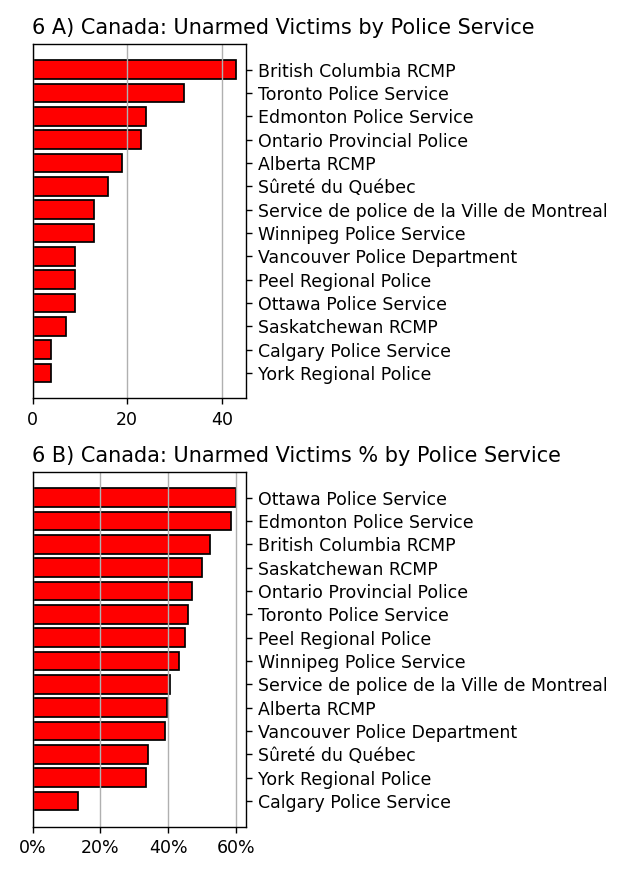

In [247]:
import matplotlib.ticker as mtick
ARMED_TYPE['Unarmed%']=ARMED_TYPE['None']/ARMED_TYPE['Total']*100
ARMED_TYPE = ARMED_TYPE.fillna(0)
fig,ax=plt.subplots(2,1,figsize=(5,7))

ax[0].set_title('6 A) Canada: Unarmed Victims by Police Service',loc='left')
ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE['Total']>10].sort_values(by='None')
ax[0].barh(ARMED_TYPE.index,ARMED_TYPE['None'].values,color=[1,0,0],edgecolor='k')
ax[0].yaxis.tick_right()
ax[0].grid(axis='x')

ax[1].set_title('6 B) Canada: Unarmed Victims % by Police Service',loc='left')
ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE['Total']>10].sort_values(by='Unarmed%')
ax[1].barh(ARMED_TYPE.index,ARMED_TYPE['Unarmed%'].values,color=[1,0,0],edgecolor='k')
ax[1].yaxis.tick_right()
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter())
ax[1].grid(axis='x')
plt.tight_layout()
plt.savefig('Content/CA_UnarmedFraction.png')

<IPython.core.display.Javascript object>


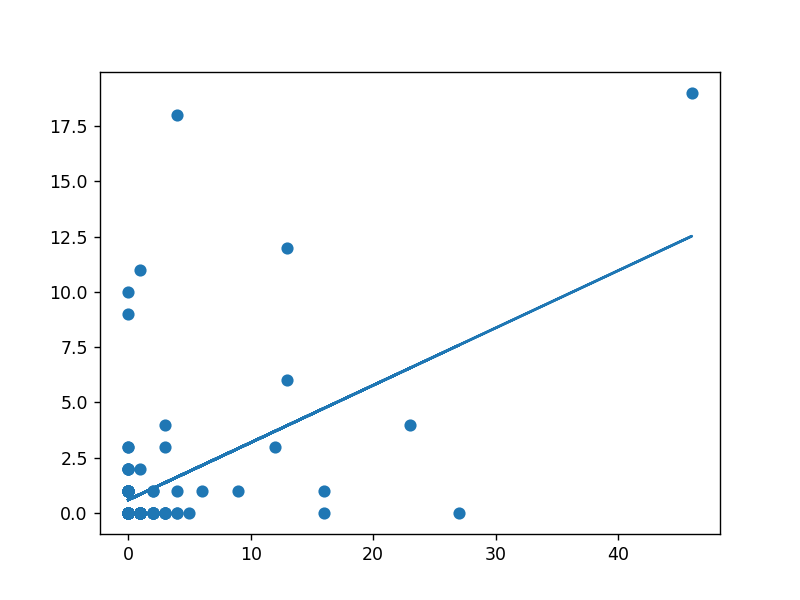

LinregressResult(slope=0.2594281818303351, intercept=0.5918465110268394, rvalue=0.4952799818756741, pvalue=3.271140195541849e-08, stderr=0.0435852611494214, intercept_stderr=0.2837644440174111)


In [248]:

plt.figure()
plt.scatter(Departments.White,Departments.Indigenous)
LR = stats.linregress(Departments.White,Departments.Indigenous)
plt.plot(Departments.White,Departments.White*LR[0]+LR[1])
print(LR)

# Questions:

What are some other applications for data normalization?

What metric(s) might you want consider when looking at White number of electric cars in each province to gauge electirc car adoption?

A) Kilometers driven
B) Cars per family
C) Median Income
D) White Population
E) Average Car Price

# The United States Data
 
The United States Data is colected by a colaboration of researchers and data scientists and is availble for download here: https://mappingpoliceviolence.org/

"We believe the data represented on this site is the most comprehensive accounting of people killed by police since 2013. Note that the Mapping Police Violence database is more comprehensive than the Washington Post police shootings database: while WaPo only tracks cases where people are fatally shot by on-duty police officers, our database includes additional incidents such as cases where police kill someone through use of a chokehold, baton, taser or other means as well as cases such as killings by off-duty police."

This is not an official count.
* This dataset is a collection of second hand information in the form of press releases, news articles, etc.
* Some records are incomplete, and the total number of incidents is likely higher than detailed here.

count    9028.000000
mean       36.821555
std        13.086463
min         1.000000
25%        27.000000
50%        35.000000
75%        45.000000
max       107.000000
Name: AGE, dtype: float64


<IPython.core.display.Javascript object>


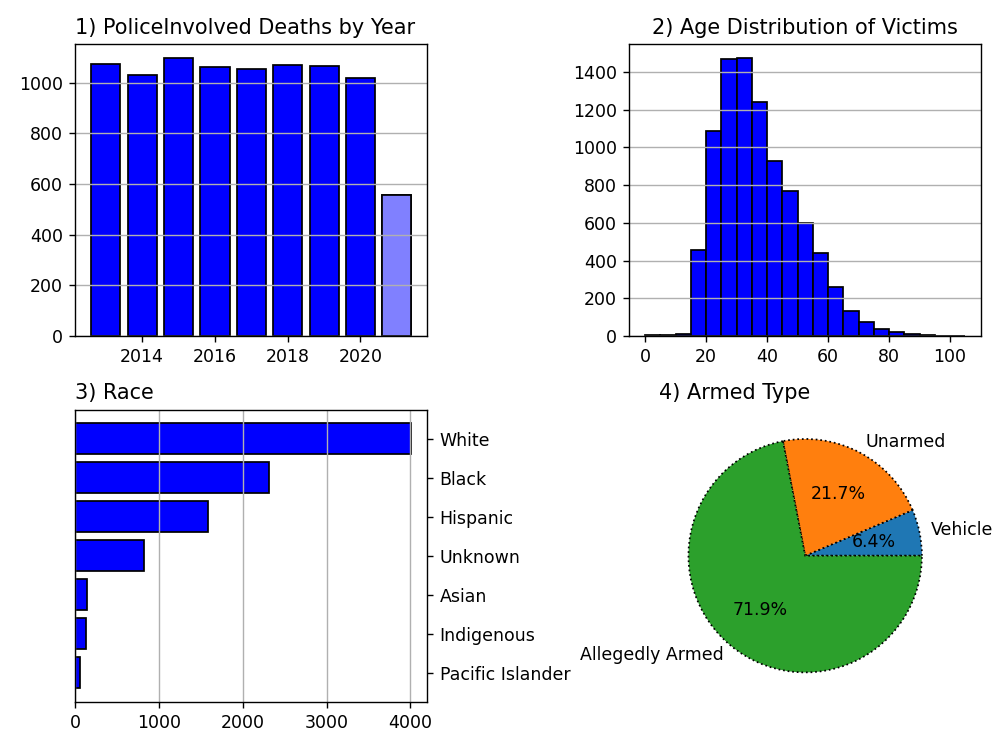

RACE
Pacific Islander    0.005871
Indigenous          0.013846
Asian               0.015064
Unknown             0.090275
Hispanic            0.175565
Black               0.256092
White               0.443288
Name: AGE, dtype: float64


In [249]:
US_Total=Data.US_PoliceKillings["State"].count()

print(Data.US_PoliceKillings["AGE"].describe())

fig,ax=plt.subplots(2,2,figsize=(8,6))
ax[0,0].set_title('1) PoliceInvolved Deaths by Year',loc='left')
ByYear=Data.US_PoliceKillings.resample('YS').count()['AGE']
ax[0,0].bar(ByYear.index.year,ByYear.values,color=[0,0,1],edgecolor='k')
ax[0,0].bar([2021],[ByYear.values[-1]],color=[.5,.5,1],edgecolor='k')
# plt.tight_layout()

ax[0,0].grid(axis='y')
# plt.savefig('Content/US_ByYear.png')

# fig,ax=plt.subplots(1,1)
ax[1,0].set_title('3) Race',loc='left')
ByRACE=Data.US_PoliceKillings.groupby('RACE').count()['AGE'].sort_values()

print(ByRACE/ByRACE.sum())
ax[1,0].barh(ByRACE.index,ByRACE.values,color=[0,0,1],edgecolor='k')

ax[1,0].yaxis.tick_right()
ax[1,0].grid(axis='x')

# plt.tight_layout()
# fig,ax=plt.subplots(1,1)
ax[1,1].set_title('4) Armed Type',loc='left')
ByRACE=Data.US_PoliceKillings.groupby('Armed/Unarmed Status').count()['AGE'].sort_values()
ax[1,1].pie(ByRACE.values,labels=ByRACE.index,
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': ':'},)
# plt.tight_layout()



# fig,ax=plt.subplots(1,1)
Data.US_PoliceKillings['AGE'].hist(bins = np.arange(0,110,5),color=[0,0,1],edgecolor='k',ax=ax[0,1])
ax[0,1].set_title('2) Age Distribution of Victims')
ax[0,1].grid(axis='x')
plt.tight_layout()



plt.savefig('Content/US_Data.png')



# Part 2) Comparing to the United States  

There are more police killings in the United States than in Canada

* What factors do we need to look at to compare police killings between Canada and the United States?

* The United States has ten times the population of Canada.  If we don't acount for that, our comparsion wont make any sense
    * The graph below is comparing two countries with very different populations and two datasets with different periods of record.

<IPython.core.display.Javascript object>


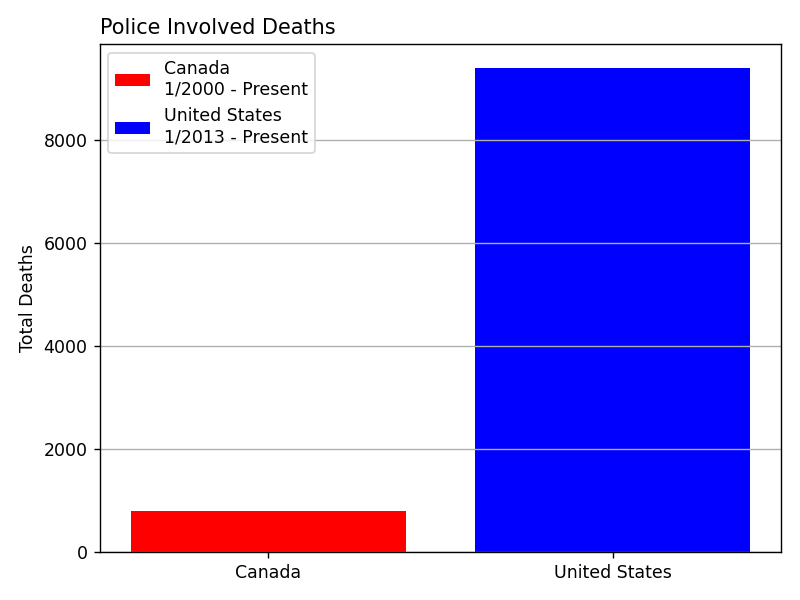

In [250]:

fig,ax=plt.subplots()
ax.bar([0],CA_Total,color=[1,0,0],label='Canada\n1/2000 - Present')
ax.bar([1],US_Total,color=[0,0,1],label='United States\n1/2013 - Present')
ax.set_xticks([0,1])
ax.set_xticklabels(['Canada','United States'])
ax.set_title('Police Involved Deaths',loc='left')
ax.set_ylabel('Total Deaths')
ax.grid(axis='y')
ax.legend()
plt.tight_layout()
plt.savefig('Content/RawComparison.png')

<IPython.core.display.Javascript object>


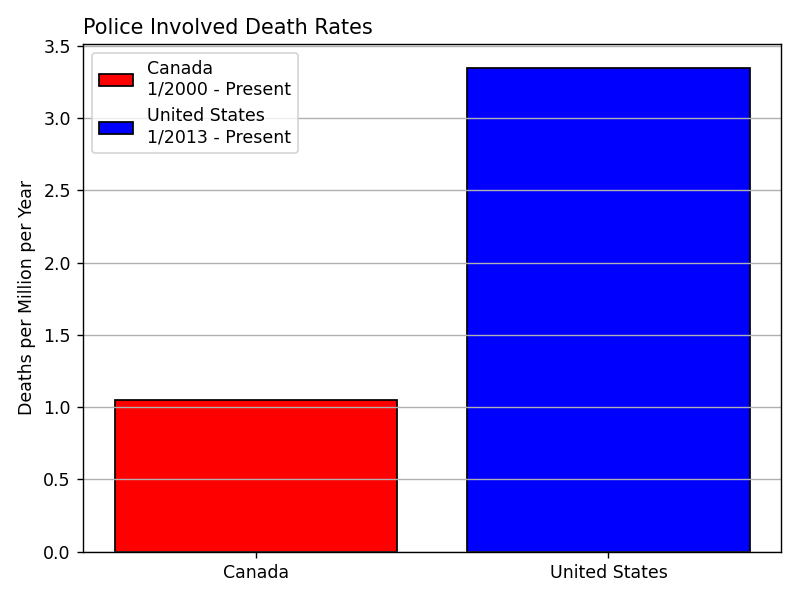

797
3.1859830354148855


In [251]:
CA_Rate = CA_Total /(Data.CA.Total.sum()*Data.CA_Length) * 1e6
US_Rate = US_Total /(Data.US.Total.sum()*Data.US_Length) * 1e6

fig,ax=plt.subplots()
ax.bar([0],CA_Rate,color=[1,0,0],label='Canada\n1/2000 - Present',edgecolor='k')
ax.bar([1],US_Rate,color=[0,0,1],label='United States\n1/2013 - Present',edgecolor='k')
ax.set_xticks([0,1])
ax.set_xticklabels(['Canada','United States'])
ax.set_title('Police Involved Death Rates',loc='left')
ax.set_ylabel('Deaths per Million per Year')
ax.legend()


ax.grid(axis='y')
ax.legend()
plt.tight_layout()
plt.savefig('Content/NormalizedComparison_Wrong.png')


print(CA_Total)
print(US_Rate/CA_Rate)

<IPython.core.display.Javascript object>


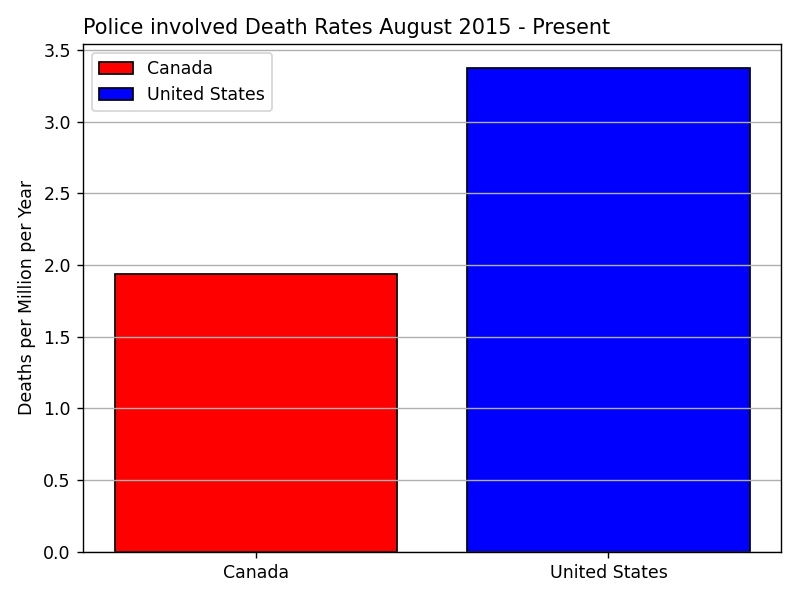

1.7417239861541702


In [252]:

Data = ParseData.GetData(start_date='2015-08-01')
US_Total=Data.US_PoliceKillings["State"].count()
CA_Total=Data.CA_PoliceKillings['prov'].count()

CA_Rate = CA_Total /(Data.CA.Total.sum()*Data.CA_Length) * 1e6
US_Rate = US_Total /(Data.US.Total.sum()*Data.US_Length) * 1e6

fig,ax=plt.subplots()
ax.bar([0],CA_Rate,color=[1,0,0],label='Canada',edgecolor='k')
ax.bar([1],US_Rate,color=[0,0,1],label='United States',edgecolor='k')
ax.set_xticks([0,1])
ax.set_xticklabels(['Canada','United States'])
ax.set_title('Police involved Death Rates August 2015 - Present',loc='left')
ax.set_ylabel('Deaths per Million per Year')
ax.legend()


ax.grid(axis='y')
ax.legend()
plt.tight_layout()
plt.savefig('Content/NormalizedComparison.png')

print(US_Rate/CA_Rate)

# What to account for

### A) Record Length
The time periods of these datasets are different
We could only look at the time period when they overlap but, but this would require us to ignore some of the data. 
Alternatively, we can calculate the average number of Deaths per year.
The data are not from the same periods, but they will be on the same time scale, and they will be as inclusive as possible
### B) Population
The Canada has about 35 million residents.  The US has about 327 million.  
To make the datasets directly comparable, we need to normalize by the total population of each country.  This will allow us to calculate the police killing rate
### C) Scale
Dividing by the population would give us the average number of police Deaths per person per year.  This will be a very small decimal.  Integers (round numbers) are easier to interpret.  We can divide by the population in millions instead.

# Police Involved Death Rates
* By normalizing, we can more directly compare the patterns between geographic regions with different characteristics (Population) and datasets of different lenghts

# Racial Disparities

Systemic Racism is pervasive on both sides of the border

* The police violence dataset and census for each country use different demographic groupings
    * We'll compare the Police Involved Death Rates of three demographic groups: White, Black, and Indigenous because they are in both datasets.
        * Whites are the majority in both countries, while black and indigenous people disproportionately impacted by police killings on both sides of the border.
* One Caveat, the race of the victim is unknown for 24% of Canadian and 10% of United States.
    * This adds uncertainty to the comparison.  It also means that the Police Involved Death Rates by race are underestimated, especially for Canada

# Systemic Racism in Policing

* Scaled, to their respective populations, we can see that Indigenous and Black people are much more likely to be killed by the police than white pople in both Canada and the United States
* The overal rates for each race are higher in the US than Canada
    * However the dispartiy between races is actually greater in Canada than the United States
    
* To show this, we can divide the black and indigenous rates fore each country by the white rate.
    * This will tell us how many times more likely a black or indigenous individual is to be killed by the police than a white individual in each country.
    * We can see that Indigenous and Black Canadians are 5.8 and 4.4 times more likely to be killied by police than a White Canadian
        * These disparities are higher than in the US
            * By this metric, you could suggest that police in Canada may be more racially biased than police in the US

['White' 'Unknown' 'Indigenous' 'Middle Eastern' 'Black' 'Asian'
 'South Asian' 'Visible minority, n.i.e' 'Latin American']
Police Involved Death Rates:


<IPython.core.display.Javascript object>


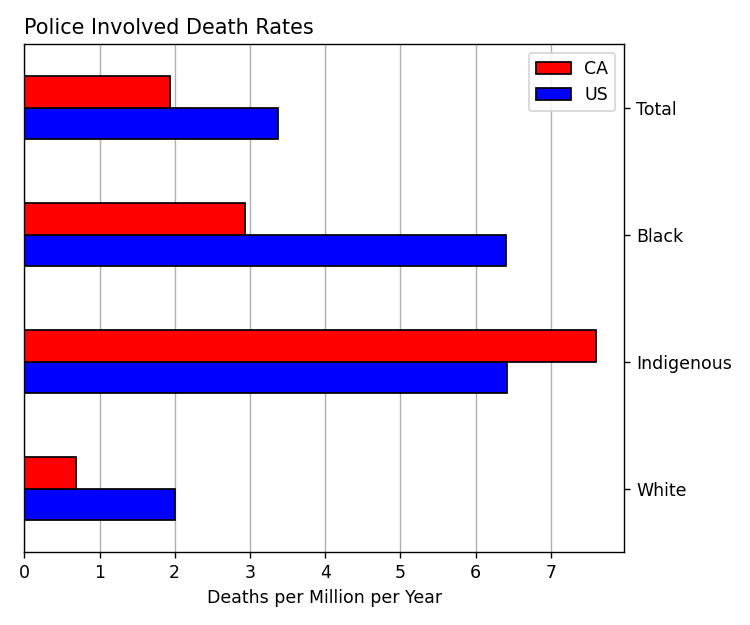

In [253]:
print(Data.CA_PoliceKillings['race'].unique())
# print(Data.Combined)

Data.ScaleData(scale=1e6)
print('Police Involved Death Rates:')
# print(Data.Summary)
Data.Summary = Data.Summary.dropna()
Data.Summary = Data.Summary.loc[Data.Summary.index!='Asian']

fig,ax=plt.subplots(figsize=(6,5))
Data.Summary[['US','CA']].plot.barh(color=[[0,0,1],[1,0,0]],edgecolor='k',ax=ax,zorder=2)
ax.set_title('Police Involved Death Rates',loc='left')
ax.set_xlabel('Deaths per Million per Year')
ax.yaxis.tick_right()
ax.grid(axis='x',zorder=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])


plt.tight_layout()
plt.savefig('Content/Racial_Comparison.png')


                  US         CA
Black       3.187851   4.225299
Indigenous  3.194516  10.949837


<IPython.core.display.Javascript object>


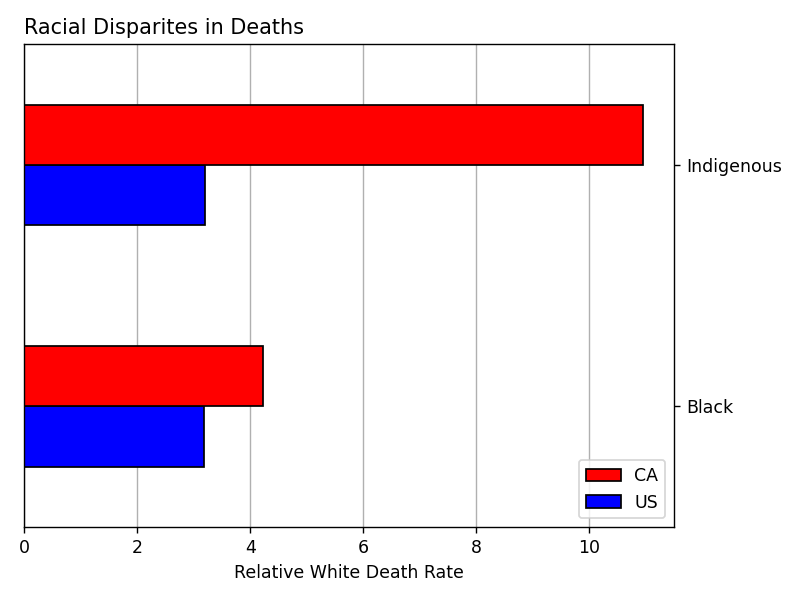

In [254]:
Ratio = Data.Summary.loc[Data.Summary.index=='Black']/Data.Summary.loc[Data.Summary.index=='White'].values
Ratio = Ratio.append(Data.Summary.loc[Data.Summary.index=='Indigenous']/Data.Summary.loc[Data.Summary.index=='White'].values)

print(Ratio)
fig,ax=plt.subplots()
Ratio.plot.barh(color=[[0,0,1],[1,0,0]],edgecolor='k',ax=ax,zorder = 2)
ax.set_title('Racial Disparites in Deaths',loc='left')
ax.set_xlabel('Relative White Death Rate')
ax.yaxis.tick_right()
ax.grid(axis='x',zorder=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])


plt.tight_layout()
plt.savefig('Content/Racial_Disparities.png')


# Systemic Racism in Policing is a Canadian Problem

This issue isn't restricted to America, it's pervasive in Canada as well and can not be overlooked. 

* The RCMP were created by Prime Minister John A. Macdonald.  He got the idea for the Mounties from the Royal Irish Constabulary, a paramilitary police force the British created to keep the Irish under control.  Initially called the "North West Mounted Rifles", their primary purpose to clear Indigenous people off their land.  The name was changed to "North-West Mounted Police" because officials in the United States raised concerns that an armed force along the border was a prelude to a military buildup.  This organization was renamed the Royal Canadian Mounted Police in 1904.

# Questions
* Which country is displaying normalized data?
A) Canada
B) The United States
C) Both
D) Neither

In [255]:
print(Data.Combined)

    White_Killings  White_Rate    White  Unknown_Killings  Unknown_Rate  \
NL             3.0    1.085531   462186               NaN      0.000000   
PE             1.0    1.252473   133527               NaN      0.000000   
NS             5.0    1.027957   813453               2.0      0.362147   
NB             NaN    0.000000   693186               1.0      0.223851   
QC            27.0    0.649790  6949091              24.0      0.491617   
..             ...         ...      ...               ...           ...   
ME            20.0    2.638242  1261453               3.0      0.372984   
HI             4.0    1.925647   345652               1.0      0.117143   
NH            16.0    2.123254  1253931               1.0      0.122673   
AZ           105.0    3.125316  5590505              42.0      0.974510   
RI             2.0    0.390244   852805               NaN      0.000000   

    Indigenous_Killings  Indigenous_Rate  Indigenous  Middle Eastern_Killings  \
NL                

<IPython.core.display.Javascript object>


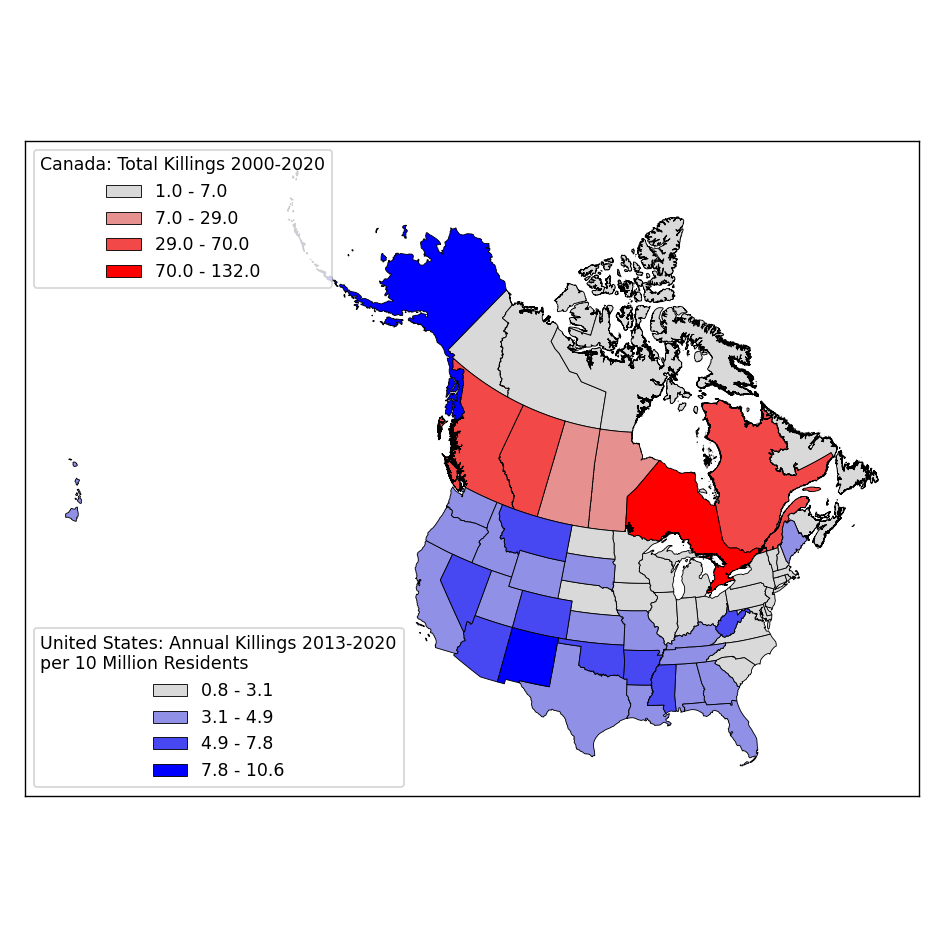

<ipython-input-256-c31e076e0e1e>:54: UserWarning: Legend does not support Text(0, 0, 'Canada') instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  first_legend = plt.legend(handles=CA_Patches, loc='upper left',


In [256]:
Rate = 'Total'
n_classes=4
Data.Breaks(column='Total_Killings',classes=n_classes,Manual_Bins=[1,4,7,91,175])
Data.US=Data.US.to_crs(Data.CA.crs)

labels=Data.CA[Rate+'_Killings_NB'].unique().sort_values()
colors = []
Grey = .85
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([Grey+(c/(n_classes-1)*(1-Grey)),Grey-(c/(n_classes-1)*Grey),Grey-(c/(n_classes-1)*Grey)]))
CA_Color = {key:value for key,value in zip(labels,colors)}
# print(CA_Color)

# import matplotlib
fig,ax=plt.subplots(figsize=(7.5,7.5))
CA_Patches = [matplotlib.text.Annotation('Canada',(0,0))]
for i,klass in enumerate(Data.CA[Rate+'_Killings_NB'].unique().sort_values()):
#     try:
    kwargs = {'facecolor':CA_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':str(np.round(Data.CA_jenks[i],1))+' - '+str(np.round(Data.CA_jenks[i+1],1))}
    if Data.CA.loc[Data.CA[Rate+'_Killings_NB']==klass].count()['PRNAME']>0:
        Data.CA.loc[Data.CA[Rate+'_Killings_NB']==klass].plot(
            ax=ax,
            **kwargs
                 )
    CA_Patches.append(mpatches.Patch(**kwargs))

Data.ScaleData(scale=1e6)
Data.Breaks(column=Rate+'_Rate',classes=n_classes,Manual_Bins=[0,.5,1,2,10])

labels=Data.US[Rate+'_Rate_NB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([Grey-(c/(n_classes-1)*Grey),Grey-(c/(n_classes-1)*Grey),Grey+(c/(n_classes-1)*(1-Grey))]))
US_Color = {key:value for key,value in zip(labels,colors)}

US_Patches = []
# US_Patches.append(mpatches.Patch(**{'facecolor':'None',
#                  'edgecolor':'None',
#                  'linewidth':.5,'label':'United States'}))
for i,klass in enumerate(Data.US[Rate+'_Rate_NB'].unique().sort_values()):
#     try:
    kwargs = {'facecolor':US_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':str(np.round(Data.US_jenks[i],1))+' - '+str(np.round(Data.US_jenks[i+1],1))}
    Data.US.loc[Data.US[Rate+'_Rate_NB']==klass].plot(
        ax=ax,
        **kwargs
             )
    US_Patches.append(mpatches.Patch(**kwargs))
first_legend = plt.legend(handles=CA_Patches, loc='upper left',
      title='Canada: Total Killings 2000-2020')

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=(US_Patches), loc='lower left',
      title='United States: Annual Killings 2013-2020\nper 10 Million Residents')
    
# ax.legend(handles={'PKR':Patches},) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# ax.set_title('Police Killings')

plt.tight_layout()
plt.savefig('Content/IsItNormalalized_Map.png',bbox_inches='tight')

# Part 3) Histograms, Data Classification, & Cloropleth Mapping


# Rates by Province/State

Police Involved Death Rates vary by administrative divisions, e.g. (State/Province)
* If we want to compare rates the first step is to look at histograms.
* A Histogram shows us the frequency distribution of a given variable
    * Data is grouped into a set of bins and counted


In [257]:
# Rate = 'Total'
# n_classes=5
# Data.Breaks(column=Rate+'_Rate',classes=n_classes,Manual_Bins=[0,.5,1,2,10])
# # plt.figure()
# import numpy as np
# fig,ax=plt.subplots()#1,2)
# # print(Data.CA['Total_Killings'].describe())
# Data.Combined['Total_Rate'].hist(ax=ax,color='#b01005',edgecolor='k',zorder=2)
# ax.grid(axis='x')
# ax.set_ylabel('Frequency')
# ax.set_xlabel('Deaths per Million per Year')
# ax.set_title('Death Rate by Province/State',loc='left')
# ax.axvline(Data.Combined['Total_Rate'].mean(), color='k', linestyle='dashed', linewidth=2,label='Mean')
# ax.axvline(Data.Combined['Total_Rate'].mean()+Data.Combined['Total_Rate'].std(), 
#             color='b', linestyle='dashed', linewidth=2,label='1 Standard Deviation')
# ax.axvline(Data.Combined['Total_Rate'].mean()-Data.Combined['Total_Rate'].std(), 
#             color='b', linestyle='dashed', linewidth=2)
# ax.legend()
# plt.savefig('Content/Combined_Rate_Hist.png')
# # print(Data.Combined.index,Data.CA.index)
# # print(Data.Combined['Total_Rate'].sort_values())
# # print(Data.CA['Total_Rate'].sort_values())

# Outliers
Histograms can be useful for spotting outliers in a dataset
* The Indigenouos Police Killing rate hisogram for the US shows an outlier
    * Vermont has a rate many times higher than the nearest value

count    64.000000
mean      4.010756
std       3.707394
min       0.671552
25%       2.189468
50%       3.302269
75%       4.593479
max      27.916594
Name: Total_Rate, dtype: float64


<IPython.core.display.Javascript object>


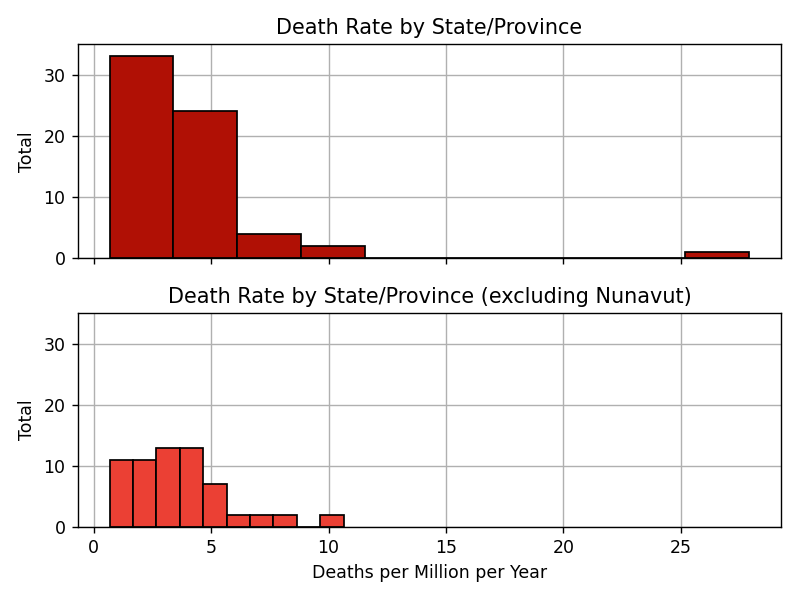

index  Total_Rate  Total_Killings    Total  Total_Fraction
0    NU      27.917             6.0    35944           100.0
1    NM      10.641           134.0  2095428           100.0
2    AK      10.605            47.0   737438           100.0
3    NT       8.005             2.0    41786           100.0
4    OK       7.849           186.0  3943079           100.0

In [258]:

Data.ScaleData(scale=1e6)
Rate = 'Total'
print(Data.Combined[Rate+'_Rate'].describe())


fig,ax=plt.subplots(2,sharex=True)
Data.Combined[Rate+'_Rate'].hist(color='#b01005',
                                 edgecolor='k',bins=10,label='All Data',zorder=2,ax=ax[0])
ax[0].set_title('Death Rate by State/Province')

# Rate = 'Total'
# print(Data.Combined[Rate+'_Rate'].describe())
Data.Combined.loc[Data.Combined[Rate+'_Rate']<20,Rate+'_Rate'].hist(color='#eb4034',
                                edgecolor='k',bins=10,label='Excluding Vermont',zorder=2,ax=ax[1])
ax[1].set_title('Death Rate by State/Province (excluding Nunavut)')
# ax.set_title('Death Rate by Province/State',loc='left')

ax[0].set_ylabel('Total')
ax[1].set_ylabel('Total')
ax[1].set_xlabel('Deaths per Million per Year')
ax[0].set_ylim(0,35)
ax[1].set_ylim(0,35)
# ax.legend()
# ax.grid(axis='x')
plt.tight_layout()
plt.savefig('Content/Combined_Hist.png')


Data.Combined[Rate+'_Fraction'] = Data.Combined[Rate]/Data.Combined['Total']*100
Data.Combined[[Rate+'_Rate',Rate+'_Killings',Rate,Rate+'_Fraction']].sort_values(Rate+'_Rate',ascending=False).round(3)[:5].reset_index()

# Classification Methods

We'll cover five classification methods

1) Equal Interval
* Data is split to bins of equal width regardless of distribution

2) Quantiles
* Data is split by percentiles

3) Natural Breaks
* Data is split using the Jenks algorithm

4) Standard Deviation
* Data is split to bins based on distance from the mean

5) Manual Breaks
* We define our own splits

# Equal Interval

* The simplest classification scheme is to just break the data into classes of equal sizes
    * e.g. The minimum is .3 and the maximum is 9.8, so we can split that into four bins 2.4 units wide


[ 0.    5.62 11.24 16.86 22.48 28.1 ]
{5.62: '#fef0d9', 11.24: '#fdcc8a', 16.86: '#fc8d59', 22.48: '#e34a33', 28.1: '#b30000'}


<IPython.core.display.Javascript object>


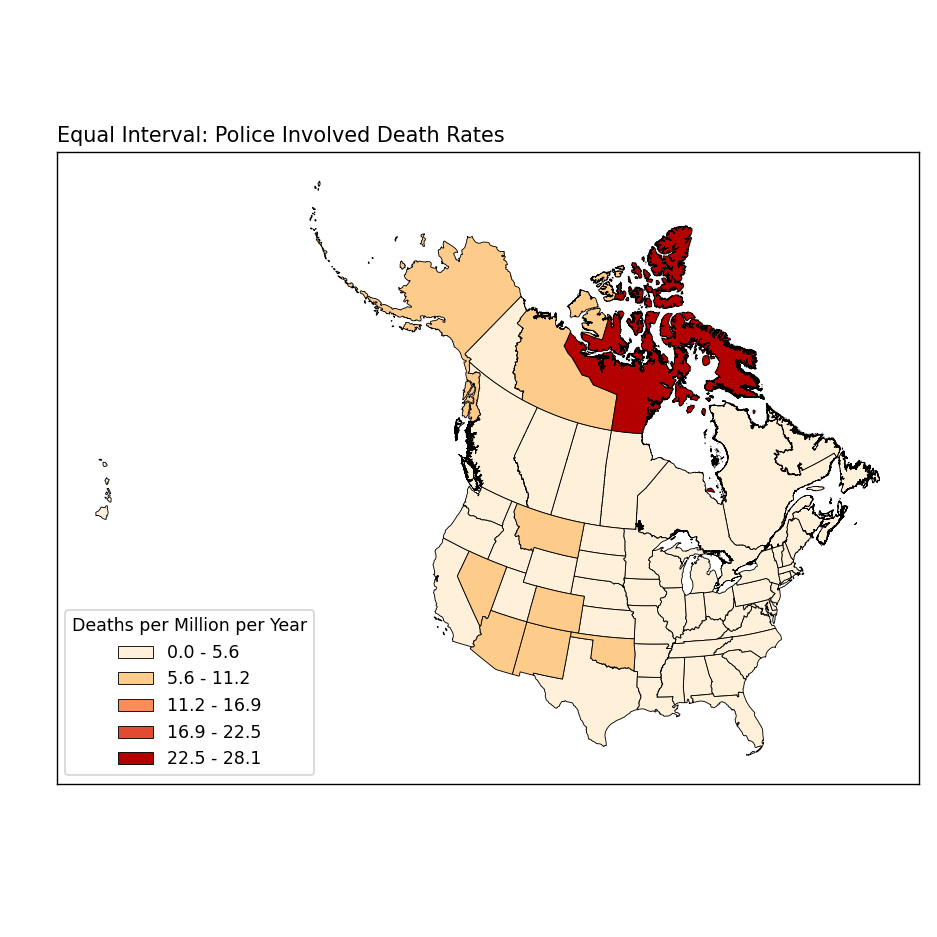

5.62
11.24
16.86
22.48
28.1


C:\Users\User\.conda\envs\geo-env\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<IPython.core.display.Javascript object>


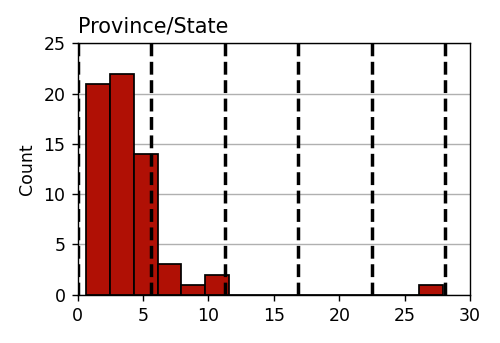

count    64.000000
mean      4.010756
std       3.707394
min       0.671552
25%       2.189468
50%       3.302269
75%       4.593479
max      27.916594
Name: Total_Rate, dtype: float64
NL     5.62
LA     5.62
NY     5.62
MI     5.62
ID     5.62
      ...  
OK    11.24
AZ    11.24
MT    11.24
NV    11.24
NU    28.10
Name: Total_Rate_EB, Length: 64, dtype: category
Categories (5, float64): [5.62 < 11.24 < 16.86 < 22.48 < 28.10]
NB     0.671552
RI     0.786903
MA     0.964343
NL     0.965368
NY     1.081399
        ...    
OK     7.849340
NT     8.004548
AK    10.605424
NM    10.641130
NU    27.916594
Name: Total_Rate, Length: 64, dtype: float64
[ 0.    5.62 11.24 16.86 22.48 28.1 ]


C:\Users\User\.conda\envs\geo-env\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


In [259]:

Data.ScaleData(scale=1e6)
Rate = 'Total'
n_classes=5
Data.Breaks(column=Rate+'_Rate',classes=n_classes,Manual_Bins=[0,1,2,5,10,30])

labels=Data.EB_bins#.sort_values()
print(labels)
colors = []
Grey = .85

colors=['#fef0d9','#fdcc8a','#fc8d59','#e34a33','#b30000']
Combined_Color = {key:value for key,value in zip(labels[1:],colors)}
# print(Data.Combined[Rate+'_Rate_EB'].unique())
print(Combined_Color)
fig,ax=plt.subplots(figsize=(7.5,7.5))
Combined_Patches = []
for i,klass in enumerate(labels[1:]):
    print(klass)
#     try:
    kwargs = {'facecolor':Combined_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':str(np.round(Data.EB_bins[i],1))+' - '+str(np.round(Data.EB_bins[i+1],1))}
    Data.Combined.loc[Data.Combined[Rate+'_Rate_EB']==klass].plot(
        ax=ax,
        **kwargs
             )
    Combined_Patches.append(mpatches.Patch(**kwargs)) 

ax.legend(handles=(Combined_Patches), loc='lower left',ncol=1,title='Deaths per Million per Year')

plt.tight_layout()
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Equal Interval: Police Involved Death Rates',loc='left')

plt.savefig('Content/EqualInterval_Map.png',bbox_inches='tight')

fig,ax = plt.subplots(1,1,figsize=(4,2.75),sharex=True)

Data.Combined[Rate+'_Rate'].hist(ax=ax,bins=15,color='#b01005',edgecolor='k',zorder=2)

print(Data.Combined[Rate+'_Rate'].describe())

for v in Data.EB_bins:
    ax.axvline(v, color='k', linestyle='dashed', linewidth=2,label='Mean')

ax.grid(axis='x')
ax.set_xlim(0,30)
ax.set_ylim(0,25)
ax.set_ylabel('Count')
ax.set_title('Province/State',loc='left')
plt.tight_layout()

plt.savefig('Content/EqualInterval_Hist.png')

print(Data.Combined[Rate+'_Rate_EB'].sort_values())
print(Data.Combined[Rate+'_Rate'].sort_values())
print(Data.EB_bins)

In [260]:
# Data.CA['Total_Rate'+'_EB'] = pd.cut(Data.CA['Total_Rate'],
#                     bins=Data.EB_bins,#pd.interval_range(start=start,freq=freq,end=end,closed='neither'),
#                     labels=Data.EB_bins[1:],
#                     include_lowest=True,
#                     duplicates='drop'
#                                )
# Data.CA['Total_Rate'+'_EB']

In [261]:
# Data.Combined_jenks
# Data.Combined['White_Rate_NB']
# Data.EB_bins

# Quantiles

<IPython.core.display.Javascript object>


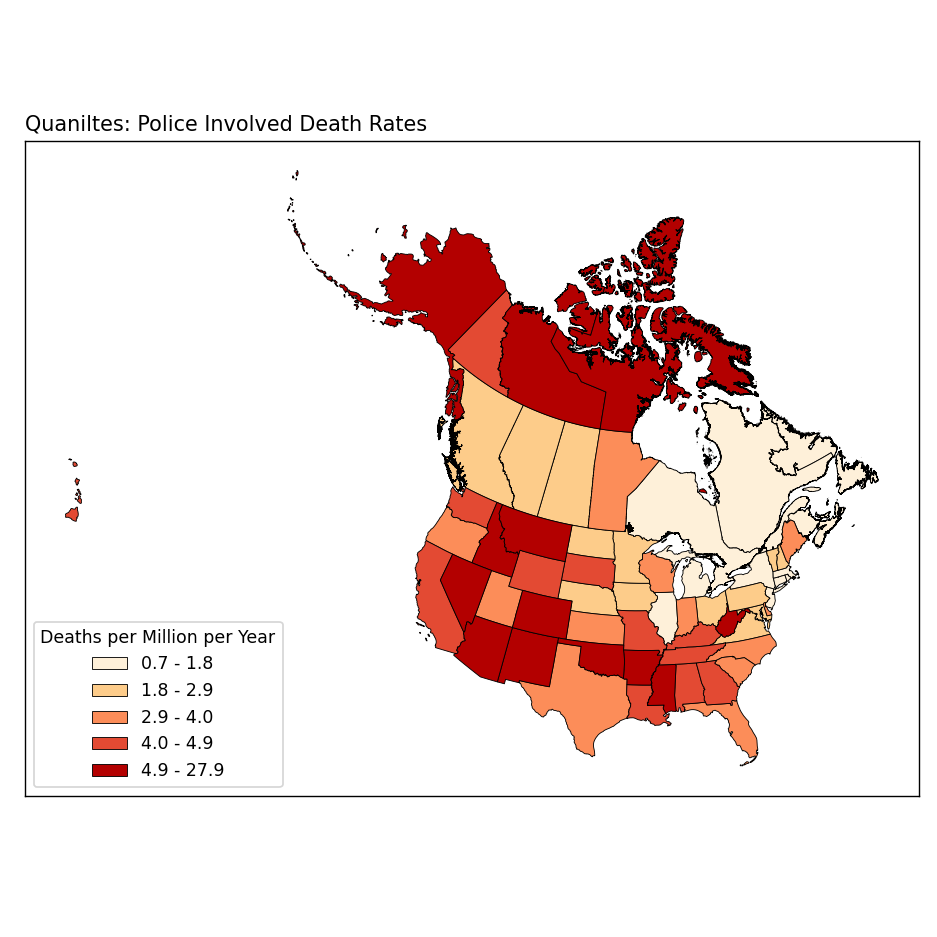

<ipython-input-262-c3864b56919a>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1,figsize=(4,2.75),sharex=True)


<IPython.core.display.Javascript object>


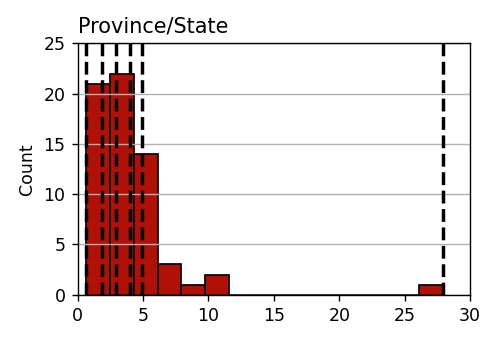

In [262]:

labels=Data.Combined[Rate+'_Rate_QB'].unique().sort_values()
# colors = []
Grey = .85

Combined_Color = {key:value for key,value in zip(labels,colors)}

fig,ax=plt.subplots(figsize=(7.5,7.5))
Combined_Patches = []

for i,klass in enumerate(Data.Combined[Rate+'_Rate_QB'].unique().sort_values()):
#     try:
    kwargs = {'facecolor':Combined_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':str(np.round(Data.Combined[Rate+'_Rate'].quantile(i/Data.classes),1))+' - '+str(np.round(Data.Combined[Rate+'_Rate'].quantile((i+1)/Data.classes),1))}
    Data.Combined.loc[Data.Combined[Rate+'_Rate_QB']==klass].plot(
        ax=ax,
        **kwargs
             )
    Combined_Patches.append(mpatches.Patch(**kwargs))

    
ax.legend(handles=(Combined_Patches), loc='lower left',ncol=1,title='Deaths per Million per Year')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Quaniltes: Police Involved Death Rates', loc='left')

plt.tight_layout()
plt.savefig('Content/Quantile_Map.png',bbox_inches='tight')

fig,ax = plt.subplots(1,1,figsize=(4,2.75),sharex=True)

Data.Combined[Rate+'_Rate'].hist(ax=ax,bins=15,color='#b01005',edgecolor='k')

for v in range(Data.classes+1):
    ax.axvline(Data.Combined[Rate+'_Rate'].quantile(v/Data.classes), color='k', linestyle='dashed', linewidth=2,label='Mean')
ax.grid(axis='x')

ax.set_xlim(0,30)
ax.set_ylim(0,25)

ax.set_ylabel('Count')

ax.set_title('Province/State',loc='left')

plt.tight_layout()

plt.savefig('Content/Quantiled_Hist.png')


# Natural Breaks

<IPython.core.display.Javascript object>


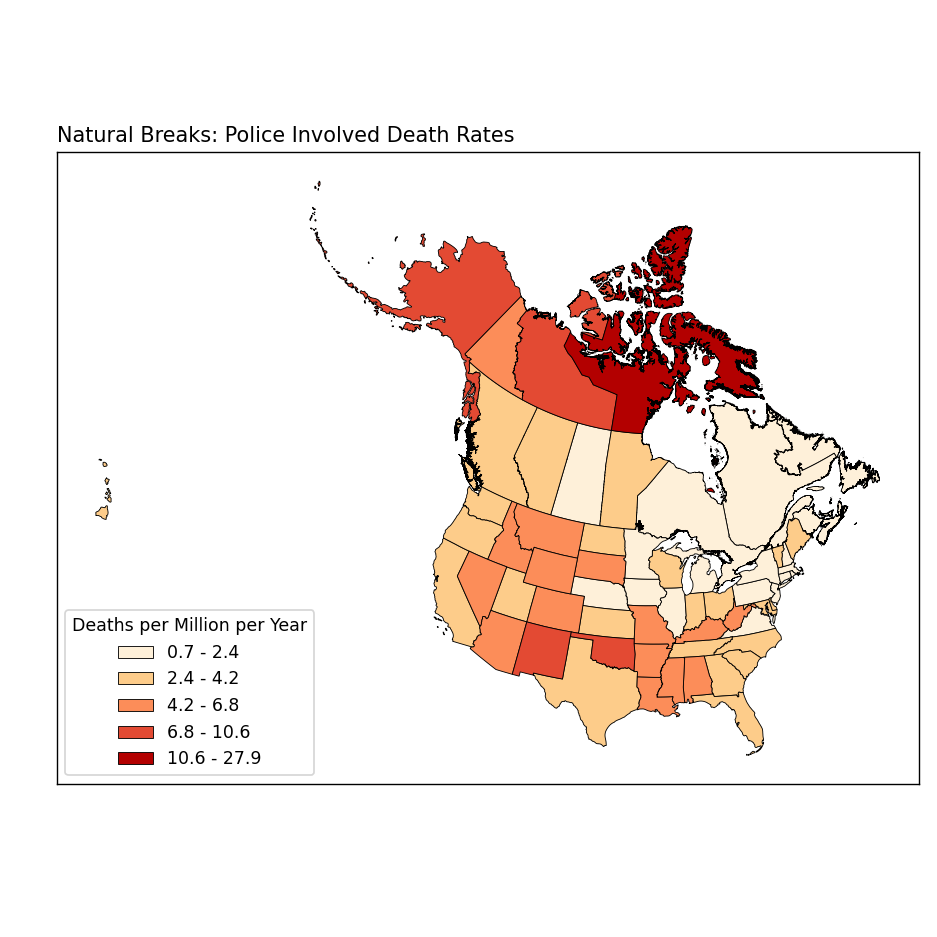

<IPython.core.display.Javascript object>


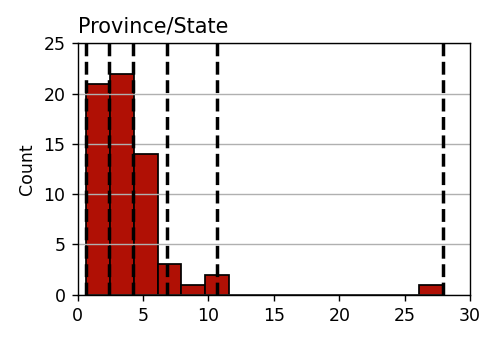

In [263]:

Rate = 'Total'
labels=Data.Combined[Rate+'_Rate_NB'].unique().sort_values()
# colors = []
Grey = .85
Combined_Color = {key:value for key,value in zip(labels,colors)}
fig,ax=plt.subplots(figsize=(7.5,7.5))
Combined_Patches = []
for i,klass in enumerate(Data.Combined[Rate+'_Rate_NB'].unique().sort_values()):
    try:
        kwargs = {'facecolor':Combined_Color[klass],
                 'edgecolor':'black',
                 'linewidth':.5,
                 'label':str(np.round(Data.Combined_jenks[i],1))+' - '+str(np.round(Data.Combined_jenks[i+1],1))}
        Data.Combined.loc[Data.Combined[Rate+'_Rate_NB']==klass].plot(
            ax=ax,
            **kwargs
                 )
        Combined_Patches.append(mpatches.Patch(**kwargs))
    except:
        pass
    

ax.legend(handles=(Combined_Patches), loc='lower left',title='Deaths per Million per Year')

plt.tight_layout()
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Natural Breaks: Police Involved Death Rates',loc='left')

plt.savefig('Content/NaturalBreaks_Map.png',bbox_inches='tight')

fig,ax = plt.subplots(1,1,figsize=(4,2.75),sharex=True)

Data.Combined[Rate+'_Rate'].hist(ax=ax,bins=15,color='#b01005',edgecolor='k')
for v0,v1 in zip(Data.Combined_jenks,Data.Combined_jenks):
    ax.axvline(v1, color='k', linestyle='dashed', linewidth=2,label='Mean')

ax.grid(axis='x')
ax.set_xlim(0,30)
ax.set_ylim(0,25)
ax.set_ylabel('Count')


ax.set_title('Province/State',loc='left')
plt.tight_layout()

plt.savefig('Content/NaturalBreaks_Hist.png')



# Manual Breaks

<IPython.core.display.Javascript object>


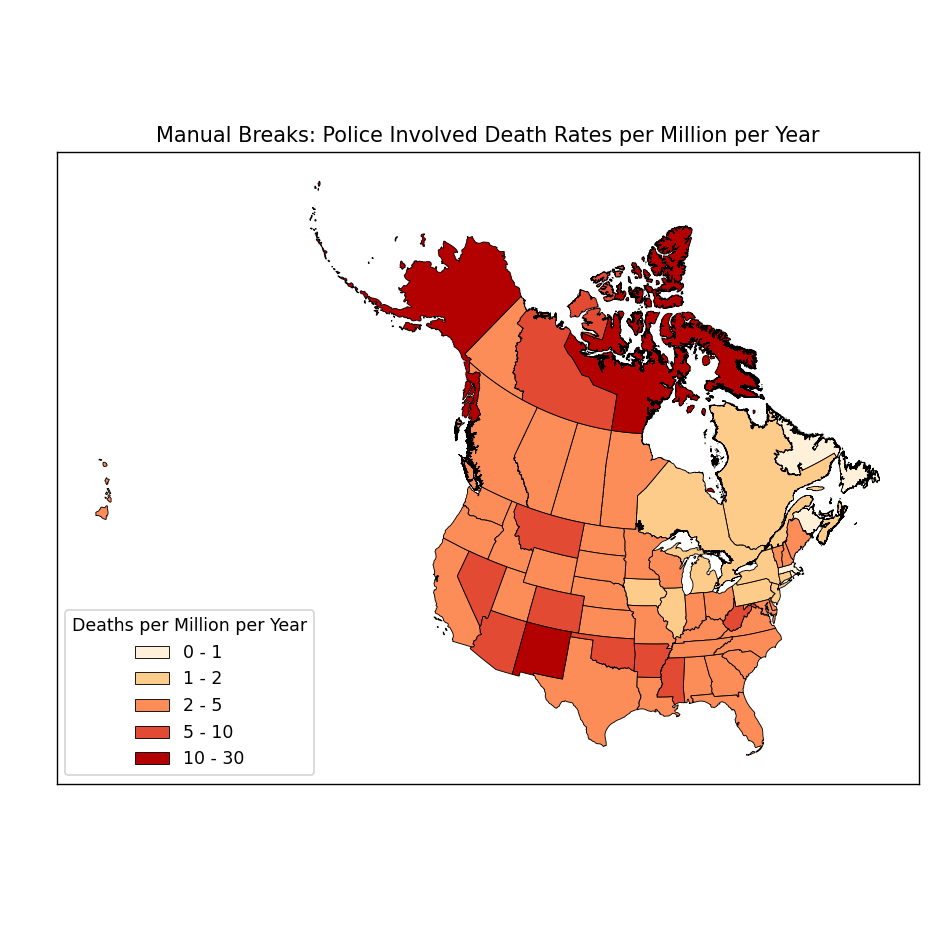

<IPython.core.display.Javascript object>


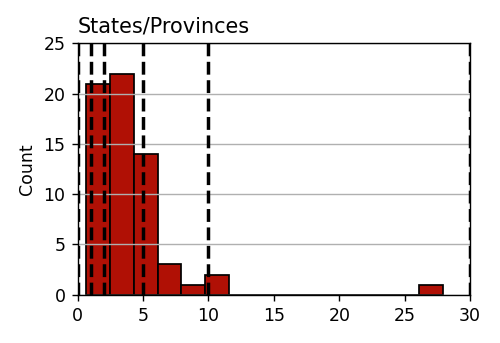

    Total_Rate  Total_Rate_MB
NL    0.965368  (-0.001, 1.0]
MA    0.964343  (-0.001, 1.0]
NB    0.671552  (-0.001, 1.0]
RI    0.786903  (-0.001, 1.0]
QC    1.413398     (1.0, 2.0]
..         ...            ...
AR    5.521253    (5.0, 10.0]
OK    7.849340    (5.0, 10.0]
NM   10.641130   (10.0, 30.0]
AK   10.605424   (10.0, 30.0]
NU   27.916594   (10.0, 30.0]

[64 rows x 2 columns]
[(-0.001, 1.0], (1.0, 2.0], (2.0, 5.0], (5.0, 10.0], (10.0, 30.0]]
Categories (5, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 5.0] < (5.0, 10.0] < (10.0, 30.0]]


In [264]:

labels=Data.Combined[Rate+'_Rate_MB'].unique().sort_values()

Combined_Color = {key:value for key,value in zip(labels,colors)}

ig,ax=plt.subplots(figsize=(7.5,7.5))
Combined_Patches = []
labels=Data.Combined[Rate+'_Rate_MB'].unique().sort_values()

for i,klass in enumerate(Data.Combined[Rate+'_Rate_MB'].unique().sort_values()):
#     try:
    kwargs = {'facecolor':Combined_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':str(np.round(Data.Manual_Bins[i],1))+' - '+str(np.round(Data.Manual_Bins[i+1],1))}
#     print(Data.Combined.loc[Data.Combined[Rate+'_Rate_MB']==klass].index)
    Data.Combined.loc[Data.Combined[Rate+'_Rate_MB']==klass].plot(
        ax=ax,
        **kwargs
             )
    Combined_Patches.append(mpatches.Patch(**kwargs))
#     except:
#         pass
    
#     print(Combined_Patches)
ax.legend(handles=(Combined_Patches), loc='lower left',title='Deaths per Million per Year')

plt.tight_layout()
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Manual Breaks: Police Involved Death Rates per Million per Year')

plt.savefig('Content/ManualBreaks_Map.png',bbox_inches='tight')

fig,ax = plt.subplots(1,1,figsize=(4,2.75),sharex=True)

Data.Combined[Rate+'_Rate'].hist(ax=ax,bins=15,color='#b01005',edgecolor='k')

for v in Data.Manual_Bins:
    ax.axvline(v, color='k', linestyle='dashed', linewidth=2,label='Mean')

ax.grid(axis='x')
ax.set_xlim(0,30)
ax.set_ylim(0,25)
ax.set_ylabel('Count')


ax.set_title('States/Provinces',loc='left')
plt.tight_layout()

plt.savefig('Content/ManualBreaks_Hist.png')

print(Data.Combined[[Rate+'_Rate',Rate+'_Rate_MB']].sort_values(by=Rate+'_Rate_MB'))
print(Data.Combined[Rate+'_Rate_MB'].unique().sort_values())

# Standard Deviation

<IPython.core.display.Javascript object>


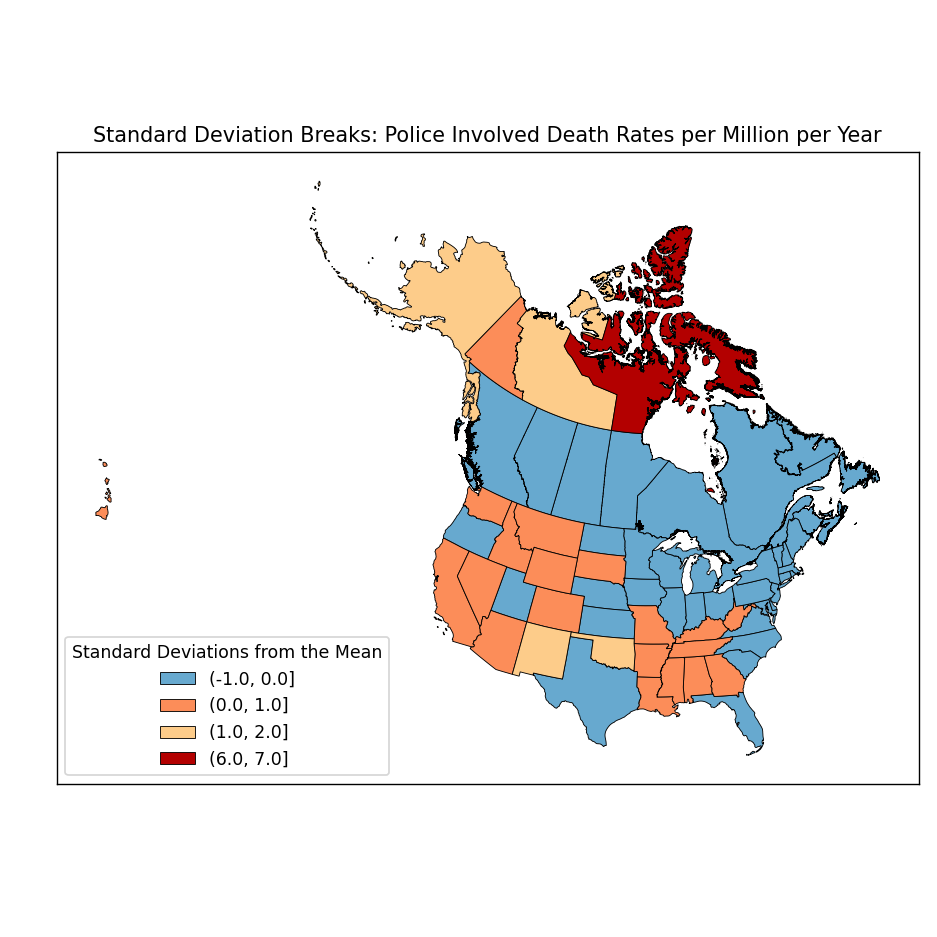

<IPython.core.display.Javascript object>


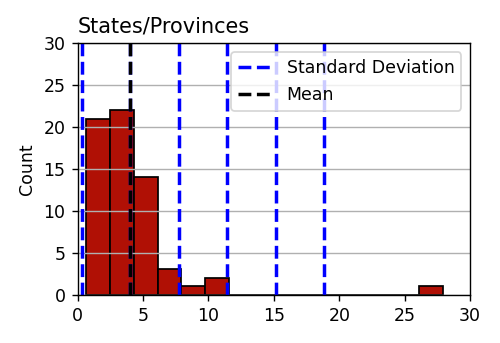

NL    (-1.0, 0.0]
OR    (-1.0, 0.0]
VA    (-1.0, 0.0]
NY    (-1.0, 0.0]
MI    (-1.0, 0.0]
         ...     
OK     (1.0, 2.0]
AK     (1.0, 2.0]
NT     (1.0, 2.0]
NM     (1.0, 2.0]
NU     (6.0, 7.0]
Name: Total_Rate_STD, Length: 64, dtype: category
Categories (16, interval[float64]): [(-8.0, -7.0] < (-7.0, -6.0] < (-6.0, -5.0] < (-5.0, -4.0] ... (4.0, 5.0] < (5.0, 6.0] < (6.0, 7.0] < (7.0, 8.0]]


In [265]:
import pandas as pd
Rate = 'Total'
labels=pd.cut(np.arange(-1,10.1),np.arange(-1,10.1))[1:]

colors_hex = []
colors_rgb = []
n_classes_STD=labels.shape[0]

Colors = ['#b30000','#b30000','#b30000','#b30000','#b30000','#b30000','#b30000',
          '#e34a33','#fdcc8a','#fc8d59','#67a9cf']#,,
Combined_Color = {key:value for key,value in zip(labels,Colors[::-1])}
# print(Combined_Color)
Combined_Patches=[]
fig,ax=plt.subplots(figsize=(7.5,7.5))
# for klass in labels:
#     print(klass)
#     kwargs = {'facecolor':Combined_Color[klass],
#              'edgecolor':'black',
#              'linewidth':.5,
#              'label':klass}
#     Combined_Patches.append(mpatches.Patch(**kwargs))

for i,klass in enumerate(Data.Combined[Rate+'_Rate_STD'].unique().sort_values()):
    try:
        kwargs = {'facecolor':Combined_Color[klass],
                 'edgecolor':'black',
                 'linewidth':.5,
                 'label':klass}## for c in range(n_classes_STD):
        Data.Combined.loc[Data.Combined[Rate+'_Rate_STD']==klass].plot(
            ax=ax,
            **kwargs
                 )
        Combined_Patches.append(mpatches.Patch(**kwargs))
    except:
        pass
ax.legend(handles=(Combined_Patches), loc='lower left',title='Standard Deviations from the Mean')
plt.tight_layout()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Standard Deviation Breaks: Police Involved Death Rates per Million per Year')

plt.savefig('Content/STDBreaks_Map.png',bbox_inches='tight')

fig,ax = plt.subplots(1,1,figsize=(4,2.75),sharex=True)

Data.Combined[Rate+'_Rate'].hist(ax=ax,bins=15,color='#b01005',edgecolor='k')

for v in range(-4,5):
    if v == 4:
        ax.axvline(Data.Combined[Rate+'_Rate'].mean()+Data.Combined[Rate+'_Rate'].std()*v,
               color='b', linestyle='dashed', linewidth=2,label='Standard Deviation')
    else:
        ax.axvline(Data.Combined[Rate+'_Rate'].mean()+Data.Combined[Rate+'_Rate'].std()*v,
               color='b', linestyle='dashed', linewidth=2)
    

ax.axvline(Data.Combined[Rate+'_Rate'].mean(), color='k', linestyle='dashed', linewidth=2,label='Mean')
ax.legend()
ax.grid(axis='x')
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.set_ylabel('Count')
ax.set_title('States/Provinces',loc='left')
plt.tight_layout()

plt.savefig('Content/STDBreaks_Hist.png')

print(Data.Combined[Rate+'_Rate_STD'].sort_values())

In [266]:
print(Data.Combined['Total_Rate'].mean())

4.0107559845309275


# Ratio to Ordinal

<IPython.core.display.Javascript object>


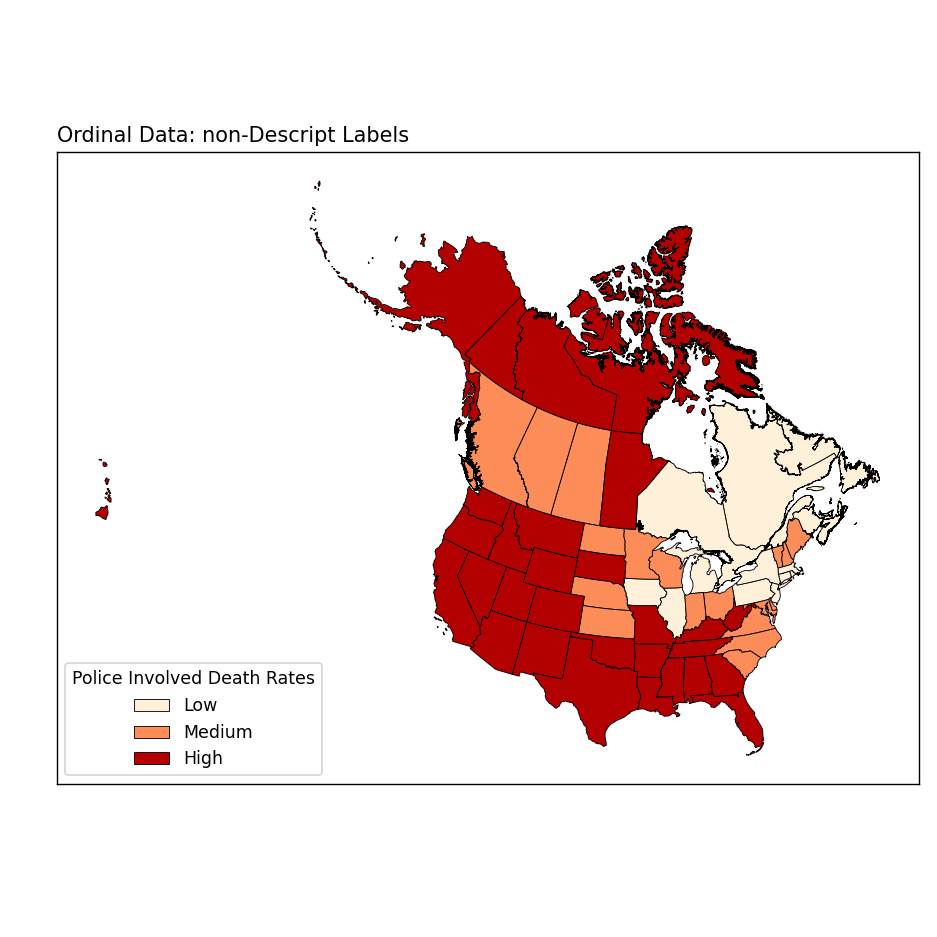

0 Low
1 Medium
2 High


<IPython.core.display.Javascript object>


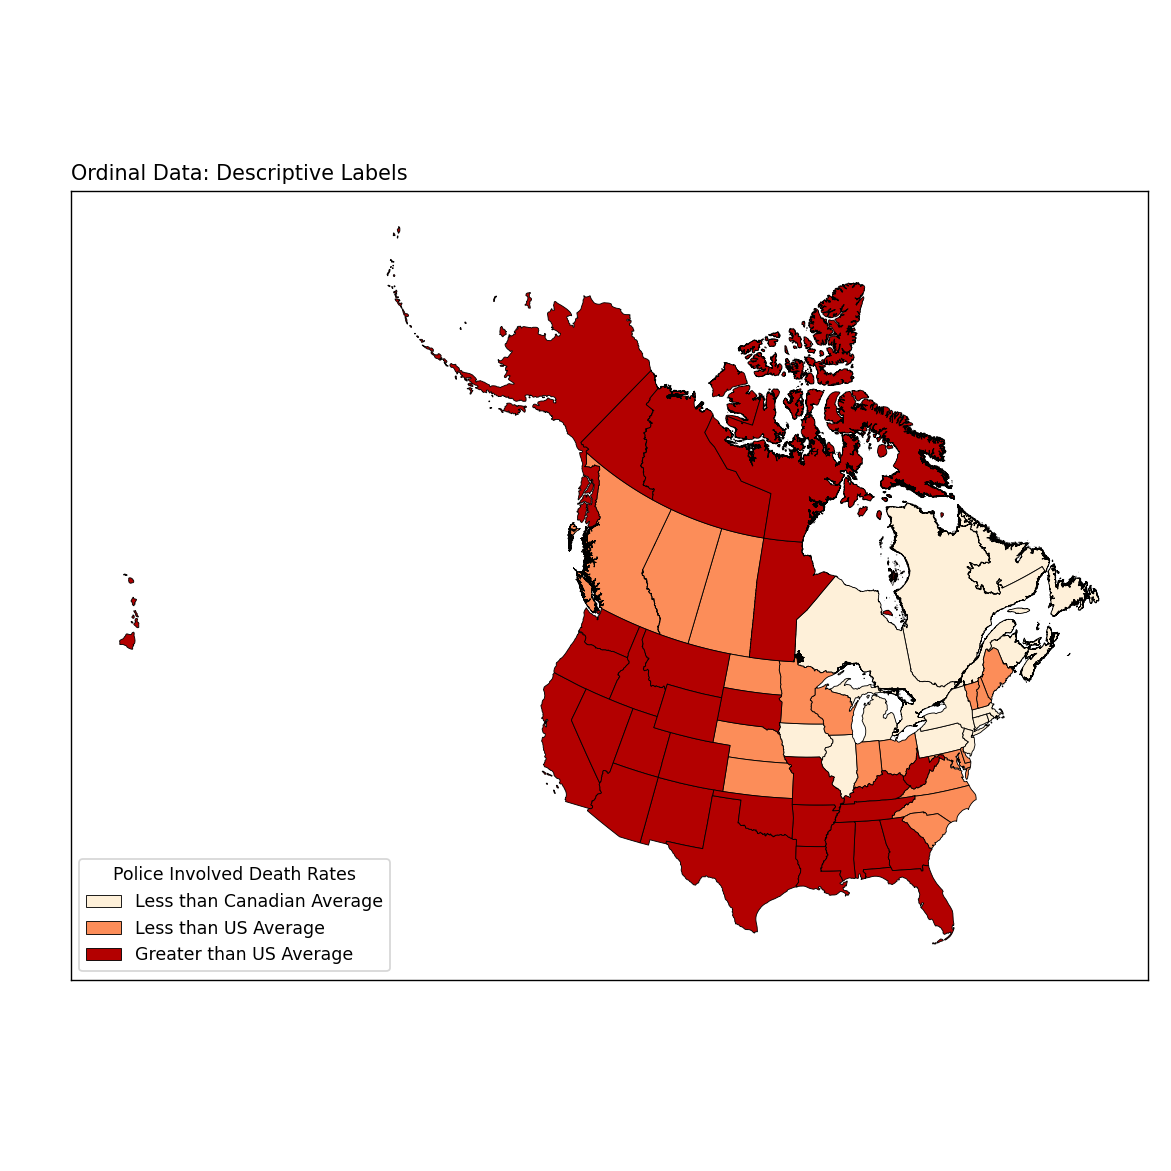

<IPython.core.display.Javascript object>


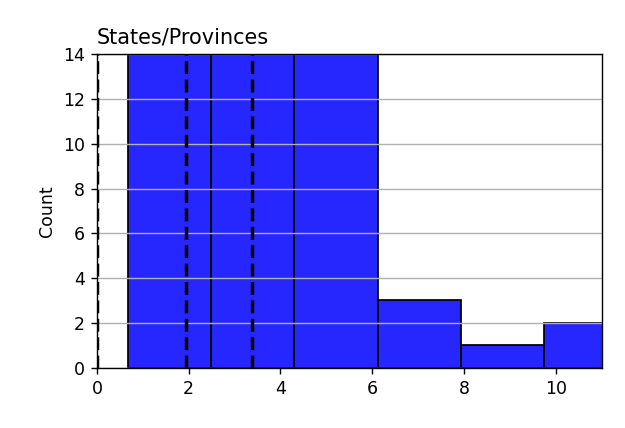

In [267]:
# CA
Data.ScaleData(scale=1e6)
Data.Breaks(column=Rate+'_Rate',classes=3,
            Manual_Bins=[0,CA_Rate,
                         US_Rate,30],
            labels=['Low',
                    'Medium',
                    'High'])


colors=['#fef0d9','#fc8d59','#b30000']
Rate = 'Total'
labels=Data.Combined[Rate+'_Rate_MB'].unique().sort_values()
# colors = []
# Grey = .85
# for c in range(n_classes):
#     colors.append(matplotlib.colors.to_hex([Grey+(c/(n_classes-1)*(1-Grey)),Grey-(c/(n_classes-1)*Grey),Grey-(c/(n_classes-1)*Grey)]))
Combined_Color = {key:value for key,value in zip(labels,colors)}
# print(Combined_Color)

# import matplotlib
fig,ax=plt.subplots(figsize=(7.5,7.5))
Combined_Patches = []

labels=Data.Combined[Rate+'_Rate_MB'].unique().sort_values()
Combined_Color = {key:value for key,value in zip(labels,colors)}
for i,klass in enumerate(Data.Combined[Rate+'_Rate_MB'].unique().sort_values()):
#     try:
    print(i,klass)
    kwargs = {'facecolor':Combined_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}#str(np.round(Data.Manual_Breaks[i],1))+' - '+str(np.round(Data.Manual_Breaks[i+1],1))}
    Data.Combined.loc[Data.Combined[Rate+'_Rate_MB']==klass].plot(
        ax=ax,
        **kwargs
             )
    Combined_Patches.append(mpatches.Patch(**kwargs))
    

ax.legend(handles=(Combined_Patches), loc='lower left',title='Police Involved Death Rates')

plt.tight_layout()
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Ordinal Data: non-Descript Labels',loc='Left')

plt.savefig('Content/Ordinal_Map_Bad_Labels.png',bbox_inches='tight')


Data.ScaleData(scale=1e6)
Data.Breaks(column=Rate+'_Rate',classes=3,
            Manual_Bins=[0,CA_Rate,
                         US_Rate,30],
            labels=['Less than Canadian Average',
                    'Less than US Average',
                    'Greater than US Average'])


# colors=['#fef0d9','#fc8d59','#b30000']
Rate = 'Total'
labels=Data.Combined[Rate+'_Rate_MB'].unique().sort_values()
Combined_Color = {key:value for key,value in zip(labels,colors)}


fig,ax=plt.subplots(figsize=(7.5,7.5))
Combined_Patches = []

labels=Data.Combined[Rate+'_Rate_MB'].unique().sort_values()
Combined_Color = {key:value for key,value in zip(labels,colors)}
for i,klass in enumerate(Data.Combined[Rate+'_Rate_MB'].unique().sort_values()):
    kwargs = {'facecolor':Combined_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.Combined.loc[Data.Combined[Rate+'_Rate_MB']==klass].plot(
        ax=ax,
        **kwargs
             )
    Combined_Patches.append(mpatches.Patch(**kwargs))

ax.legend(handles=(Combined_Patches), loc='lower left',title='Police Involved Death Rates')

plt.tight_layout()
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Ordinal Data: Descriptive Labels',loc='Left')

plt.savefig('Content/Ordinal_Map.png',bbox_inches='tight')
fig,ax = plt.subplots(1,1,figsize=(4,2.75),sharex=True)

Data.Combined[Rate+'_Rate'].hist(ax=ax,bins=15,color=[0,0,1,Grey],edgecolor='k')

for v in Data.Manual_Bins:
    ax.axvline(v, color='k', linestyle='dashed', linewidth=2,label='Mean')

ax.grid(axis='x')
ax.set_xlim(0,11)
ax.set_ylim(0,14)
ax.set_ylabel('Count')


ax.set_title('States/Provinces',loc='left')
plt.tight_layout()

plt.savefig('Content/Ordinal_Hist.png')


In [268]:
# print(Data.Combined.columns)#.sort_values())
# print(Data.CA.append(Data.US
# Categories = [v for v in Data.CA_PoliceKillings.race.unique()]
# for c in Data.US_PoliceKillings.race.unique():
#     if c not in Data.CA_PoliceKillings.race.unique():
#         Categories.append(c)
print(Data.US.columns)
print(Data.US_PoliceKillings.RACE.unique())

Index([                  'STATEFP',                   'STATENS',
                           'GEOID',                      'NAME',
                            'LSAD',                     'ALAND',
                          'AWATER',                  'geometry',
                           'State',                     'White',
                           'Black',                'Indigenous',
                           'Asian',          'Pacific Islander',
                 'Some other race',                  'Hispanic',
                           'Total',                     'Mixed',
                  'Total_Killings',            'Asian_Killings',
                  'Black_Killings',         'Hispanic_Killings',
             'Indigenous_Killings', 'Pacific Islander_Killings',
                'Unknown_Killings',            'White_Killings',
                              2015,                        2016,
                              2017,                        2018,
                         

# Categorical

In [269]:
All = Data.CA_PoliceKillings.groupby(['prov','race']).count()['age'].unstack().max(axis=1)
Max1 = Data.CA_PoliceKillings.groupby(['prov','race']).count()['age'].unstack().max(axis=1)
Max2 = Data.CA_PoliceKillings.groupby(['prov','race']).count()['age'].unstack().T
Data.CA['Top']=''
for v,i in zip(Max1,Max1.index):
    Data.CA.loc[Data.CA.index == i,'Top']=Max2.loc[Max2[i]==v].index.values[0]
# print(Data.CA['Top'])


All = Data.US_PoliceKillings.groupby(['State','RACE']).count()['AGE'].unstack().max(axis=1)
Max1 = Data.US_PoliceKillings.groupby(['State','RACE']).count()['AGE'].unstack().max(axis=1)
Max2 = Data.US_PoliceKillings.groupby(['State','RACE']).count()['AGE'].unstack().T
Data.US['Top']=''
for v,i in zip(Max1,Max1.index):
    Data.US.loc[Data.US.index == i,'Top']=Max2.loc[Max2[i]==v].index.values[0]
# print(Data.US['Top'])


R = ['White','Black','Indigenous','Latin American','Hispanic','Pacific Islander']
Tempp = Data.Combined.copy()
for r in R:
    Tempp.loc[((Tempp[r]/Tempp['Total']<=.025)&(Tempp[r+'_Killings']<=2)),r+'_Rate']=np.nan
#     Tempp.loc[Tempp[r]<=5e3,r+'_Rate']=np.nan

Max = Tempp[['White_Rate','Black_Rate','Indigenous_Rate','Latin American_Rate','Hispanic_Rate','Pacific Islander_Rate']].max(axis=1)
Temp = Tempp[['White_Rate','Black_Rate','Indigenous_Rate','Latin American_Rate','Hispanic_Rate','Pacific Islander_Rate']]
# print(Temp.loc[Temp==Max])
Data.Combined['Top']=''
for index,row in Temp.iterrows():
#     print()
    Data.Combined.loc[Data.Combined.index==index,'Top']=row.loc[row==Max[index]].index.values[0].split('_')[0]
# print(Max
# print(Data.Combined['Top'])
# print(Data.Combined[['White_Rate','Black_Rate','Indigenous_Rate']])
print(Data.Combined[['Pacific Islander','Pacific Islander_Rate','Black_Rate','Pacific Islander_Killings','Top']].sort_values(by='Pacific Islander').dropna())

    Pacific Islander  Pacific Islander_Rate  Black_Rate  \
ID            2763.0              60.224724   13.780614   
MI            3907.0              42.590456    4.592867   
PA            5008.0              33.227019    5.358730   
MO            7385.0              22.532283   13.466546   
AK            7958.0              20.909891   19.811991   
NC           10218.0              16.285076    4.492196   
TX           21463.0               7.752919    6.180423   
WA           53924.0              15.429207   15.396509   
HI          144971.0              26.399907   11.749402   
CA          155739.0               9.616141   10.783254   

    Pacific Islander_Killings               Top  
ID                        1.0             White  
MI                        1.0             Black  
PA                        1.0             Black  
MO                        1.0             Black  
AK                        1.0             Black  
NC                        1.0             Black  


['White' 'Indigenous' 'Unknown']
['Black' 'White' 'Hispanic' 'Indigenous' 'Pacific Islander']


<IPython.core.display.Javascript object>


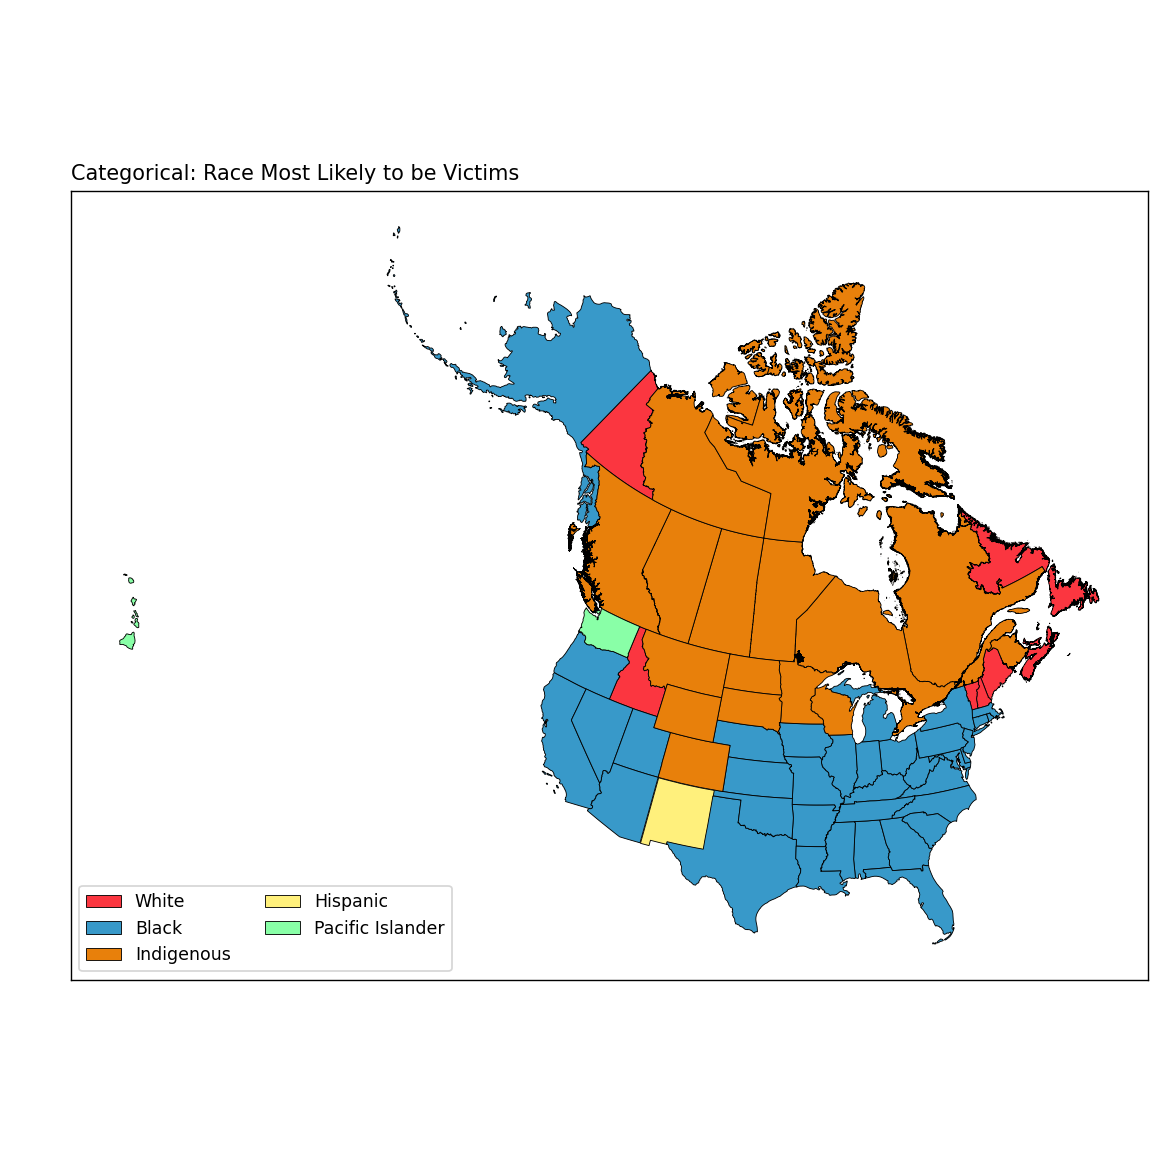

<IPython.core.display.Javascript object>


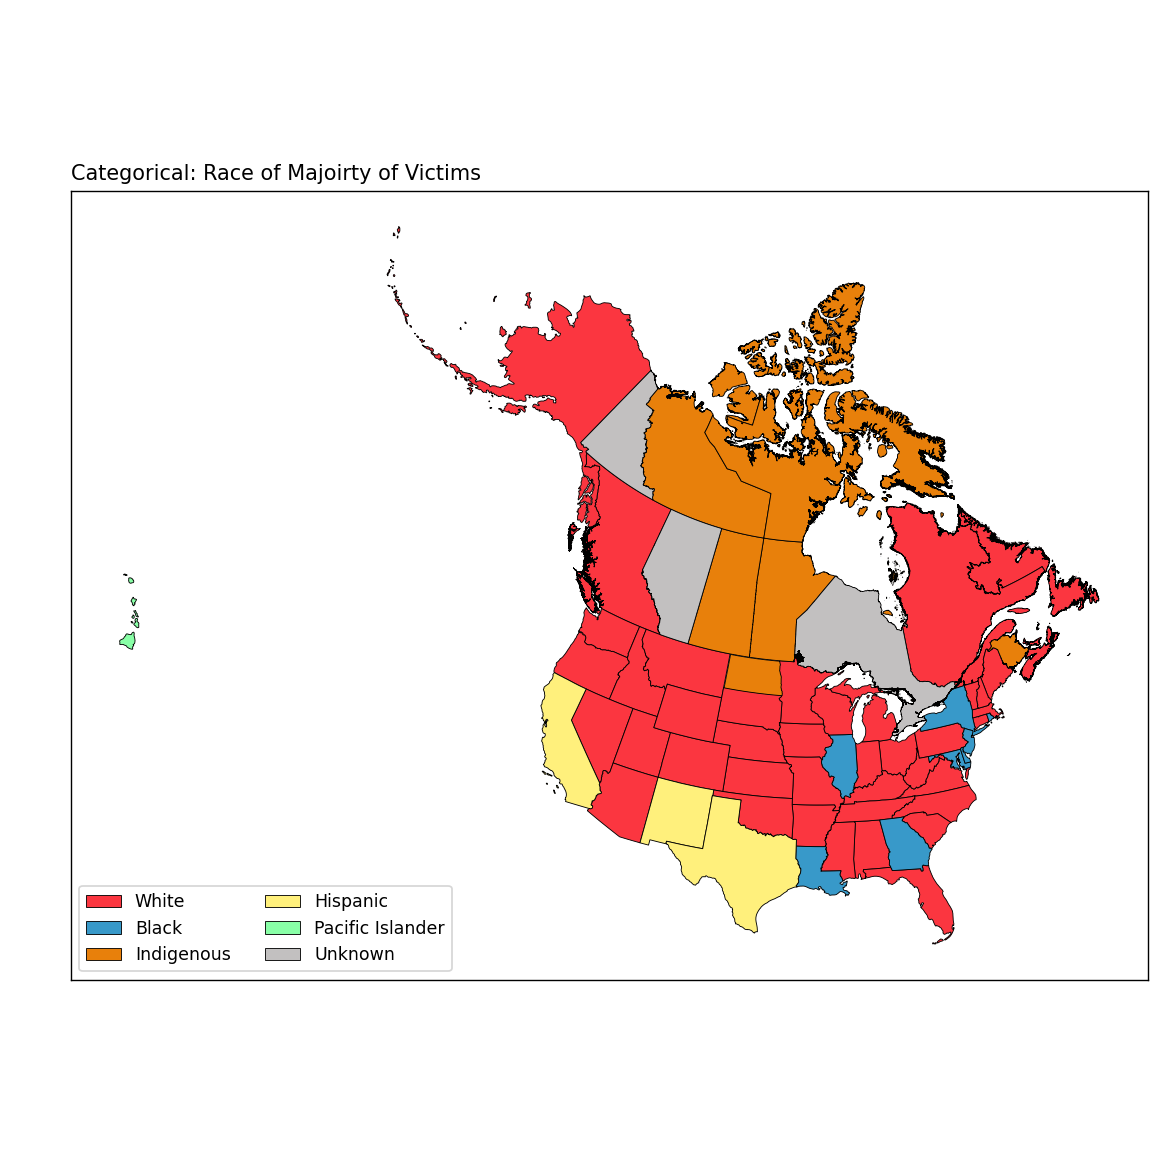

In [270]:
print(Data.CA['Top'].unique())
print(Data.US['Top'].unique())
raceColor={'White':'#FB3640',
           'Black':'#3899C9',
           'Indigenous':'#E8800B',
           'Hispanic':'#FFF07C',
           'Pacific Islander':'#89FFA7',
           'Unknown':'#c2c0c0'}

fig,ax=plt.subplots(figsize=(7.5,7.5))
CA_Patches = []#[matplotlib.text.Annotation('Canada',(0,0))]

# CA_Patches.append(mpatches.Patch(**{'facecolor':'None',
#                  'edgecolor':'None',
#                  'linewidth':.5,'label':'Canada\n2000-2020'}))
for klass in raceColor.keys():
#     try:?
   #str(np.round(Data.CA_STD_bins[i],1))+' - '+str(np.round(Data.CA_STD_bins[i+1],1))}
    if Data.Combined.loc[Data.Combined['Top']==klass].count().Total_Killings>0:
        kwargs = {'facecolor':raceColor[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
        Data.Combined.loc[Data.Combined['Top']==klass].plot(
        ax=ax,
        **kwargs
             )
        CA_Patches.append(mpatches.Patch(**kwargs))


ax.legend(handles=(CA_Patches), loc='lower left',ncol=2)

plt.tight_layout()
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Categorical: Race Most Likely to be Victims',loc='left')

plt.savefig('Content/HighestRaterace_Map.png',bbox_inches='tight')

# raceColor={'White':'#FB3640',
#            'Black':'#3899C9',
#            'Indigenous':'#E8800B',
#            'Hispanic':'#FFF07C',
#            'Pacific Islander':'#89FFA7'}

fig,ax=plt.subplots(figsize=(7.5,7.5))
CA_Patches = []#[matplotlib.text.Annotation('Canada',(0,0))]

# CA_Patches.append(mpatches.Patch(**{'facecolor':'None',
#                  'edgecolor':'None',
#                  'linewidth':.5,'label':'Canada\n2000-2020'}))
for klass in raceColor.keys():
#     try:?
    kwargs = {'facecolor':raceColor[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}#str(np.round(Data.CA_STD_bins[i],1))+' - '+str(np.round(Data.CA_STD_bins[i+1],1))}
    if Data.CA.loc[Data.CA['Top']==klass].count().Total_Killings>0:
        Data.CA.loc[Data.CA['Top']==klass].plot(
        ax=ax,
        **kwargs
             )
    if Data.US.loc[Data.US['Top']==klass].count()['State']>0:
    
        Data.US.loc[Data.US['Top']==klass].plot(
            ax=ax,
            **kwargs
                 )
    CA_Patches.append(mpatches.Patch(**kwargs))


ax.legend(handles=(CA_Patches), loc='lower left',ncol=2)

plt.tight_layout()
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Categorical: Race of Majoirty of Victims',loc='left')

plt.savefig('Content/MostNumerousrace_Map.png',bbox_inches='tight')
